<a href="https://colab.research.google.com/github/Rishabh1928/Mobile_PriceRange_Prediction/blob/main/Rishabh_Kesarwani_Mobile_Price_Range_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problem Statement**

In the competitive mobile phone market, companies want
to understand sales data of mobile phones and factors which drive the prices.

The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. 

In this problem, we do not have to predict the
actual price but a price range indicating how high the price is.

#**Overview of Dataset 📊**

Battery_power - Total energy a battery can store in one time measured in mAh

Blue - Has bluetooth or not

Clock_speed - speed at which microprocessor executes instructions

Dual_sim - Has dual sim support or not

Fc - Front Camera mega pixels

Four_g - Has 4G or not

Int_memory - Internal Memory in Gigabytes

M_dep - Mobile Depth in cm

Mobile_wt - Weight of mobile phone

N_cores - Number of cores of processor

Pc - Primary Camera mega pixels

Px_height - Pixel Resolution Height

Px_width - Pixel Resolution Width

Ram - Random Access Memory in Mega Bytes

Sc_h - Screen Height of mobile in cm

Sc_w - Screen Width of mobile in cm

Talk_time - longest time that a single battery charge will last when you are

Three_g - Has 3G or not

Touch_screen - Has touch screen or not

Wifi - Has wifi or not

Price_range - 
This is the target variable with value of:

0(low cost), 

1(medium cost),

2(high cost),

3(very high cost).



```
# It's basically a MULTI-CLASS CLASSIFICATION problem..
```



In [20]:
# Loading basic dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

In [21]:
# Reading the data

file_path = "/content/drive/MyDrive/Almabetter/Capstone Project 3 (Mobile Price Range Prediction)/DATA/data_mobile_price_range.csv"
df = pd.read_csv(file_path)

In [ ]:
# Let's see how our data looks like

df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
# Shape of our data

df.shape

(2000, 21)

In [ ]:
# All columns

df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
# Basic info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc



```
# All features are given with int or float dtype but few of them represents categorical var!!
```



In [ ]:
# basic statistical summary

df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
# Null values

df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

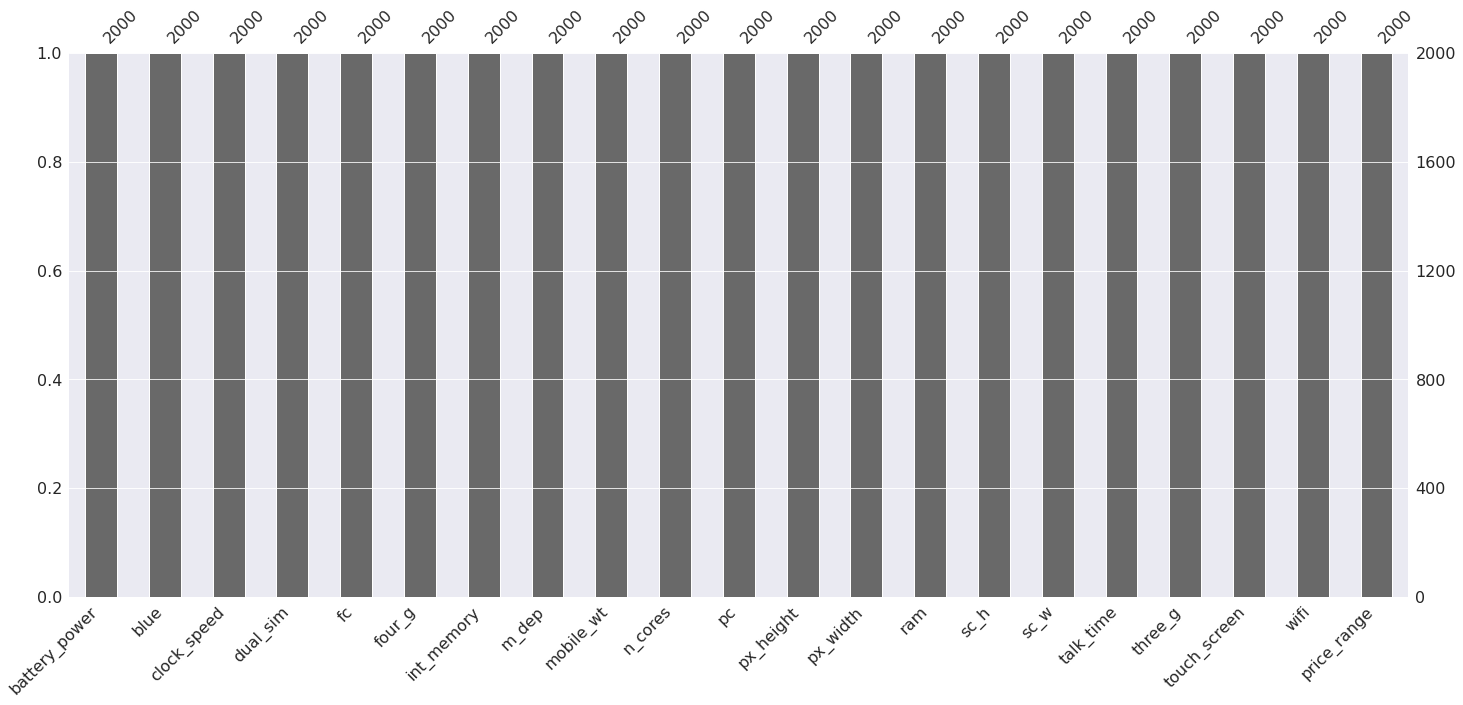

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt
msno.bar(df)
plt.show()



```
# Great! We don't have null values!!
```



In [ ]:
# Checking duplicates

df.duplicated().sum()

0

**Let's see distribution of our target variable**

In [ ]:
# Price range distribution

df["price_range"].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

(array([  0., 100., 200., 300., 400., 500., 600.]),
 <a list of 7 Text major ticklabel objects>)

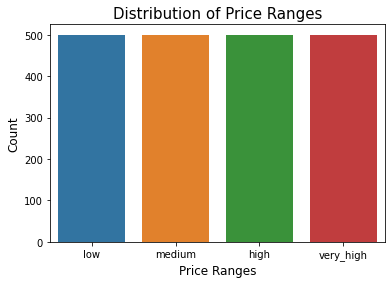

In [ ]:
# Plotting the distribution

sns.countplot(df["price_range"])
plt.title("Distribution of Price Ranges" , fontsize = 15)
plt.xlabel("Price Ranges" ,  fontsize = 12)
plt.ylabel("Count" , fontsize = 12)
plt.xticks(fontsize = 10 , labels= ["low" , "medium" , "high" , "very_high"] , ticks = [0,1,2,3])
plt.yticks(fontsize = 10)



```
# So, we have equal distribution of clasess i.e. 500 each
```



##**Let's see how our features are related with our target variable i.e Price Range**

### **Automatic EDA**



In [ ]:
import sweetviz as sv
import IPython

In [ ]:
sweet_report = sv.analyze(df)

                                             |          | [  0%]   00:00 -> (? left)

In [ ]:
sweet_report.show_html('sweet_report.html')

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



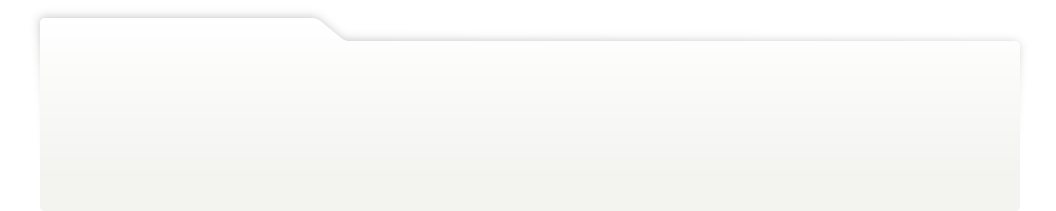
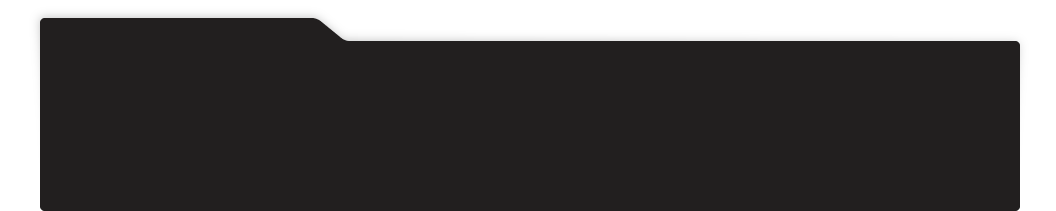
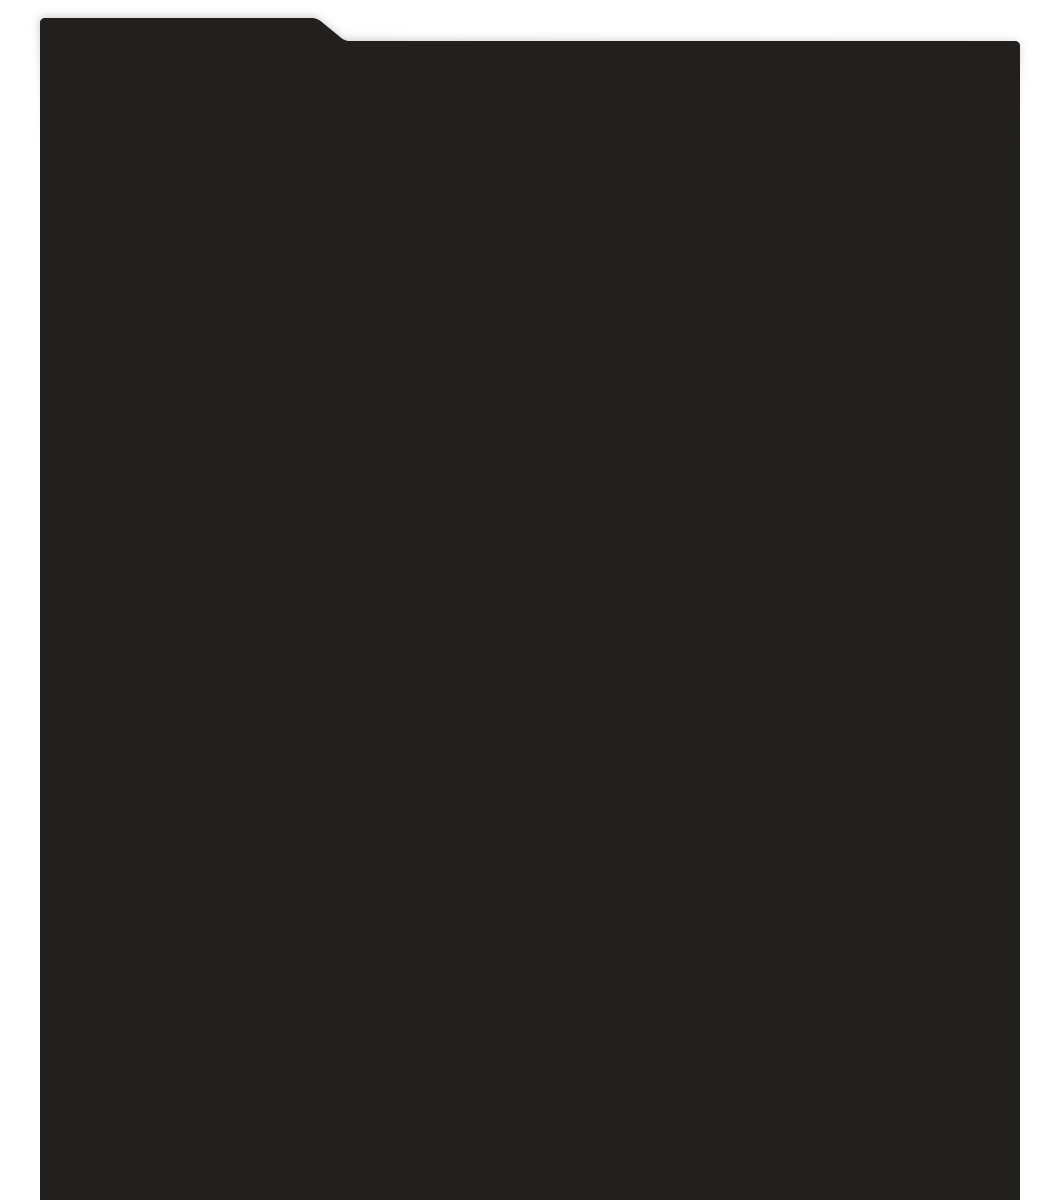
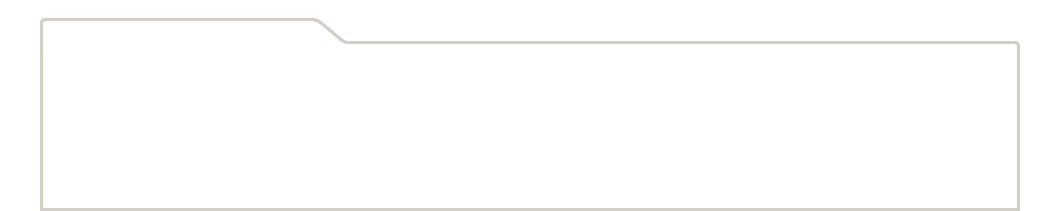
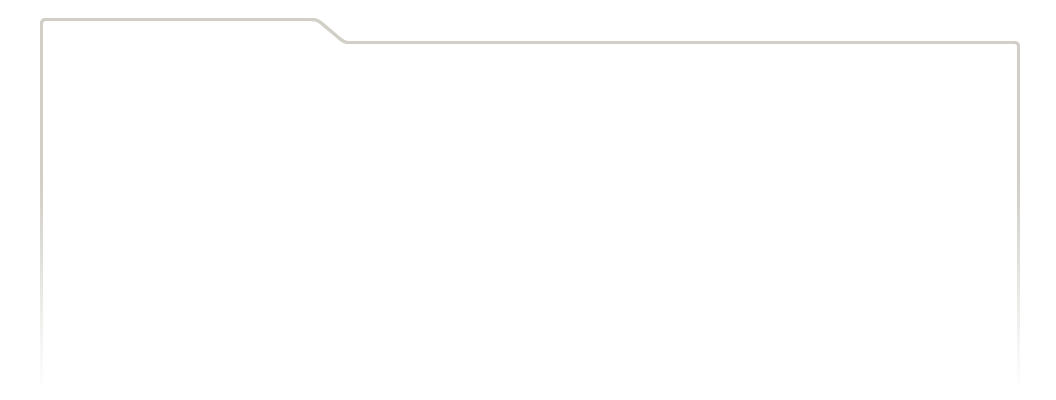
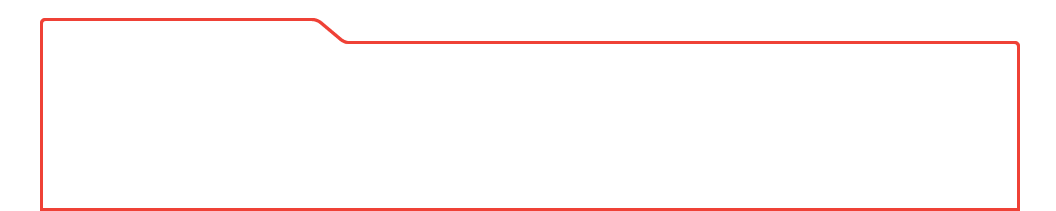
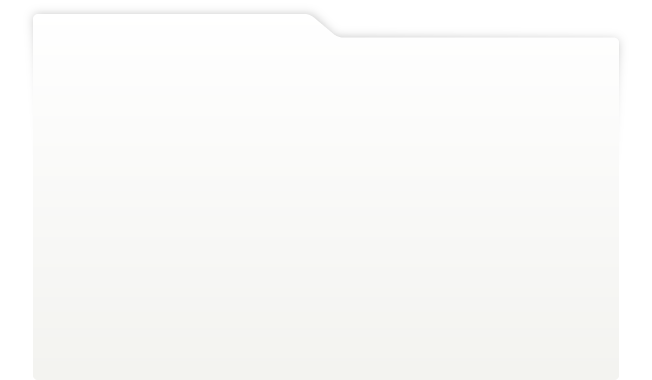
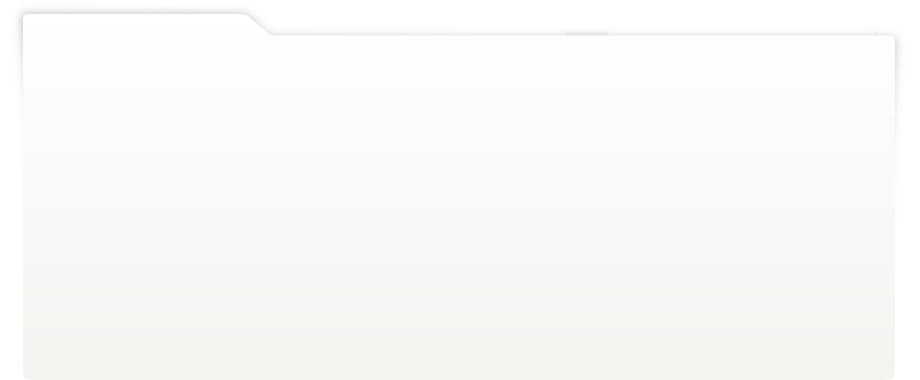
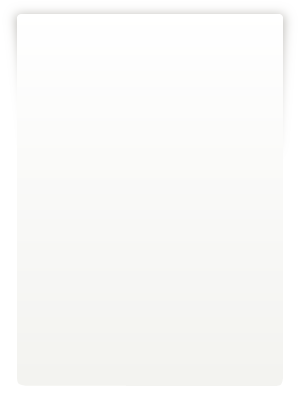
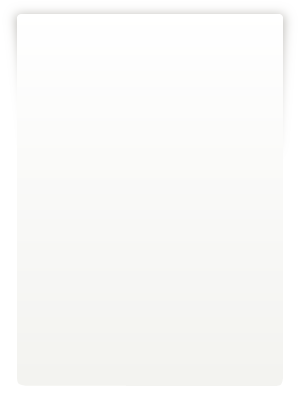
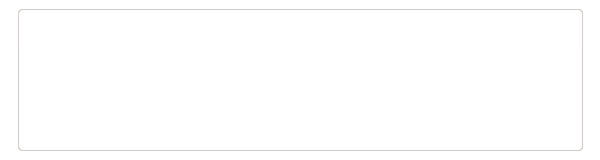
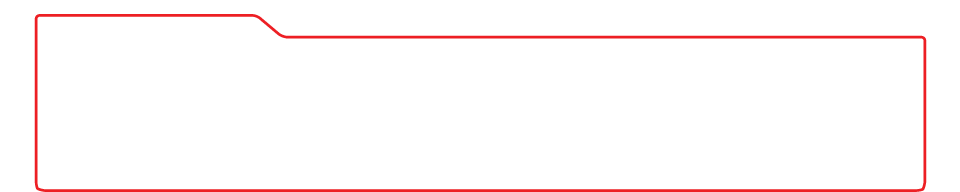
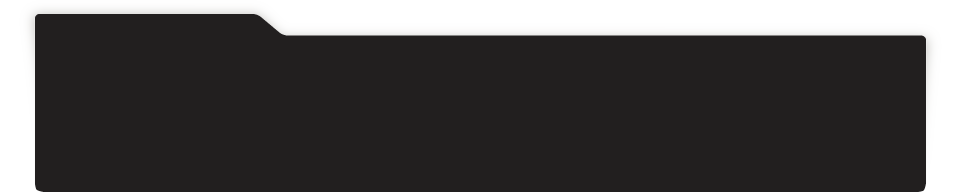
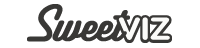
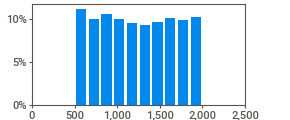
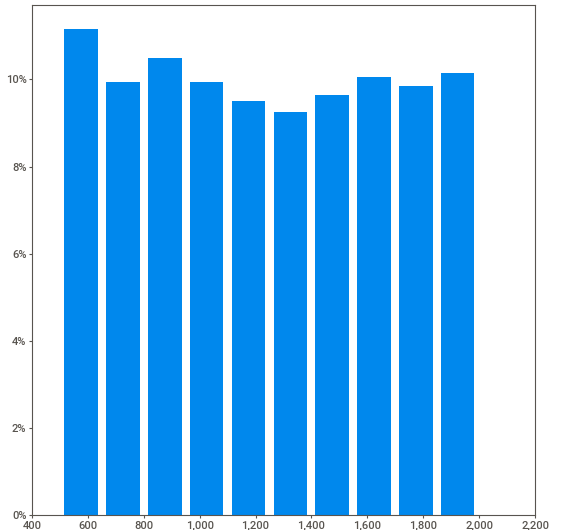
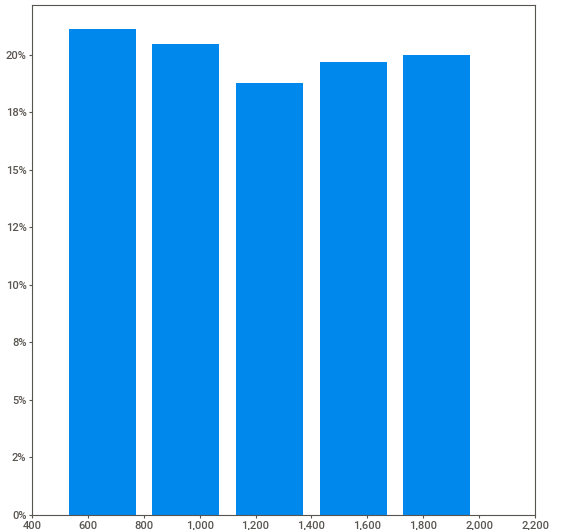
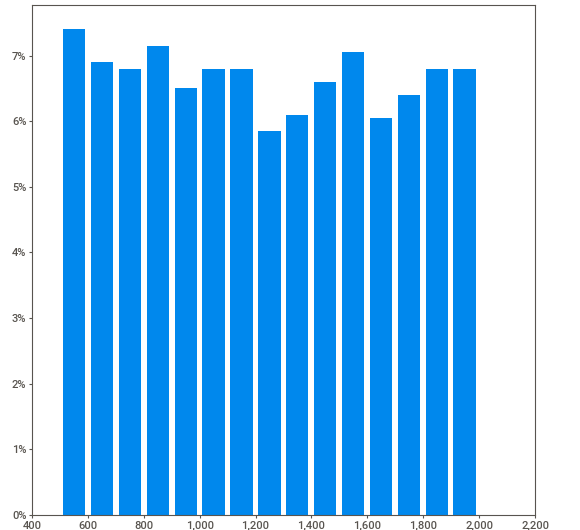
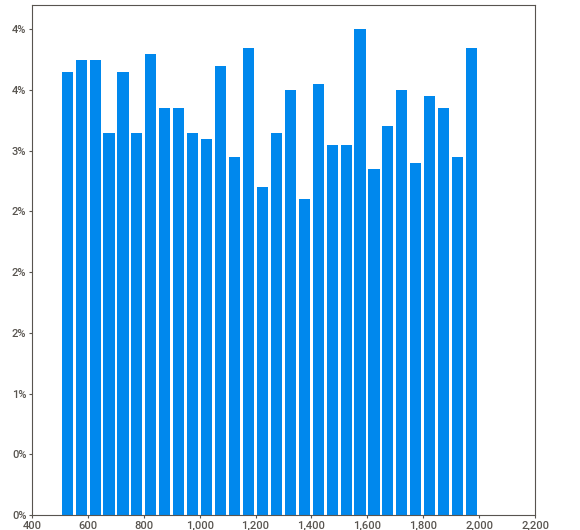
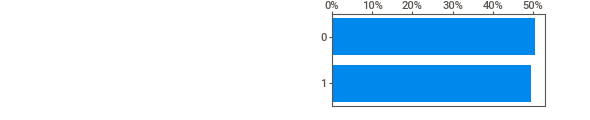
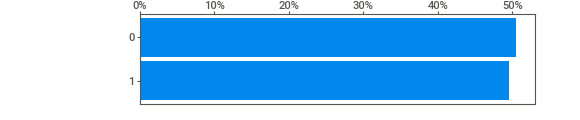
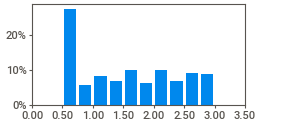
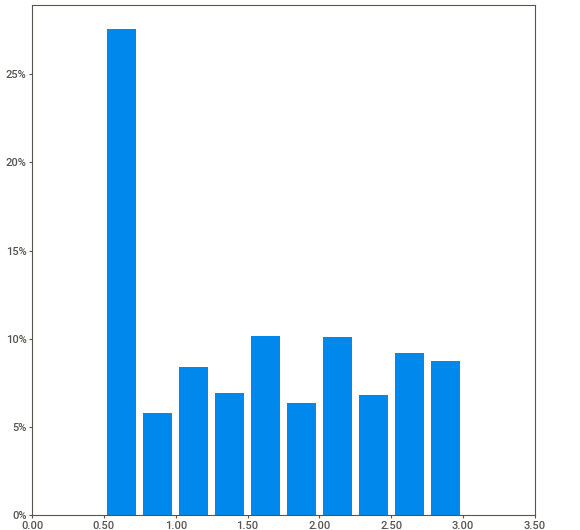
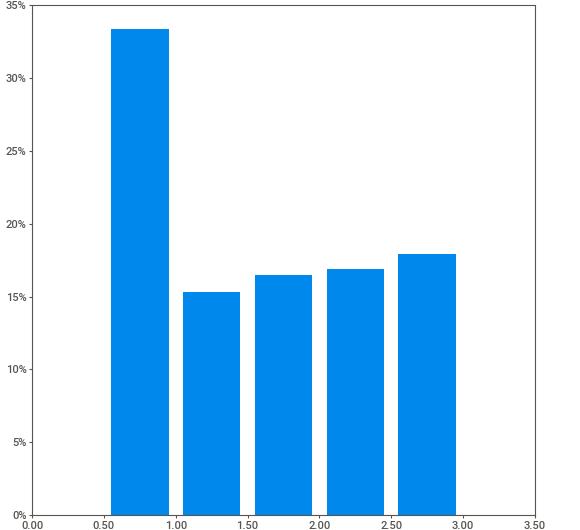
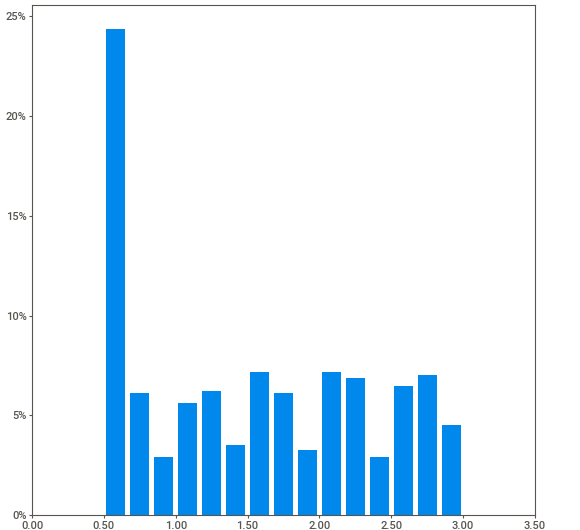
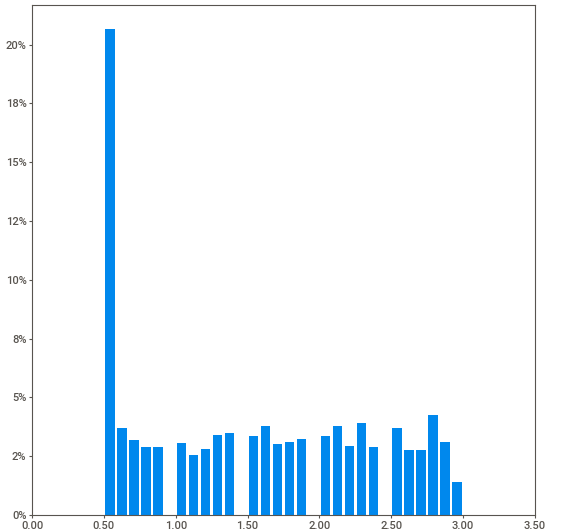
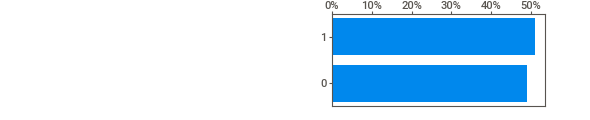
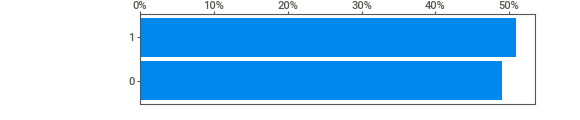
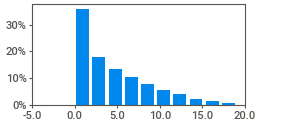
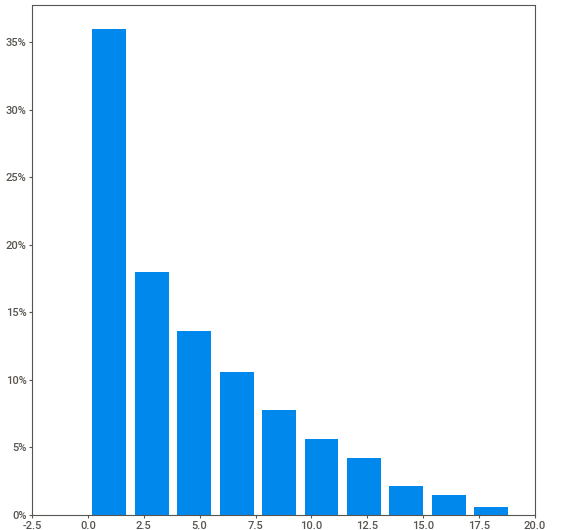
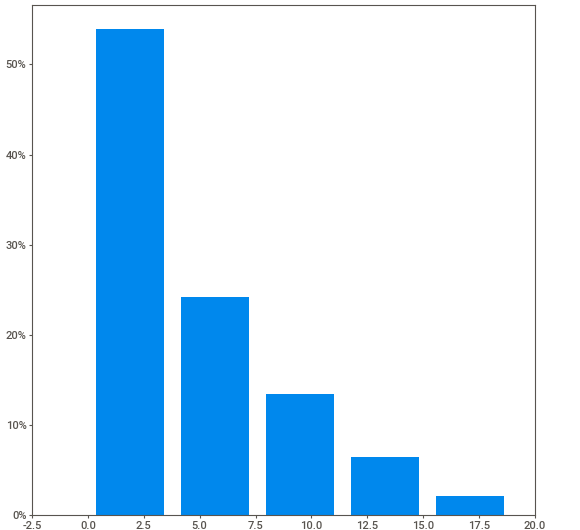
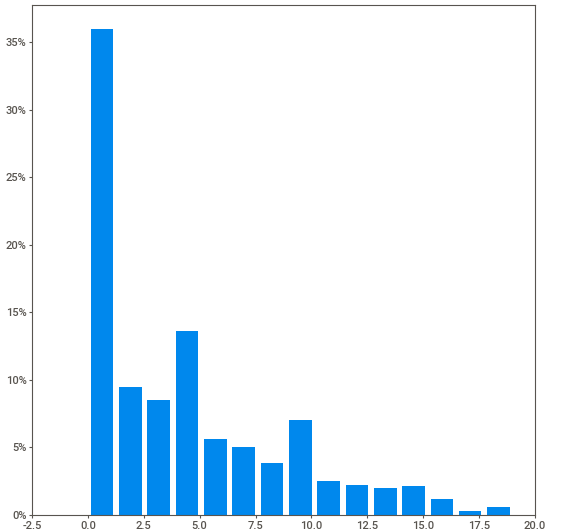
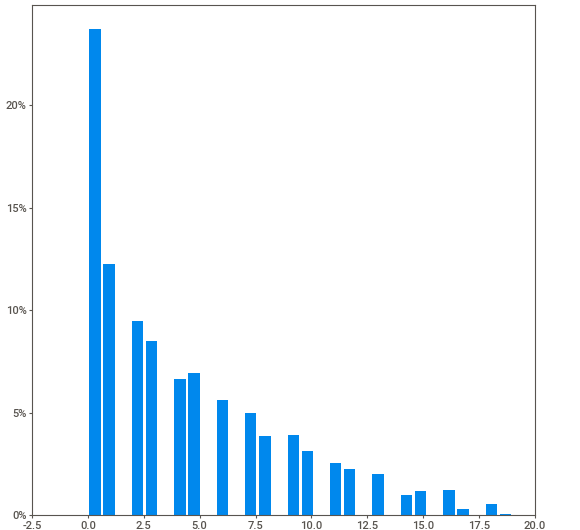
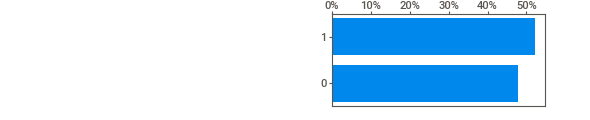
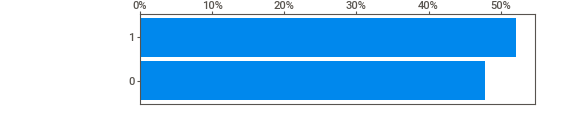
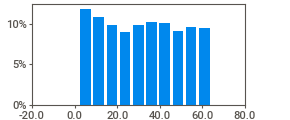
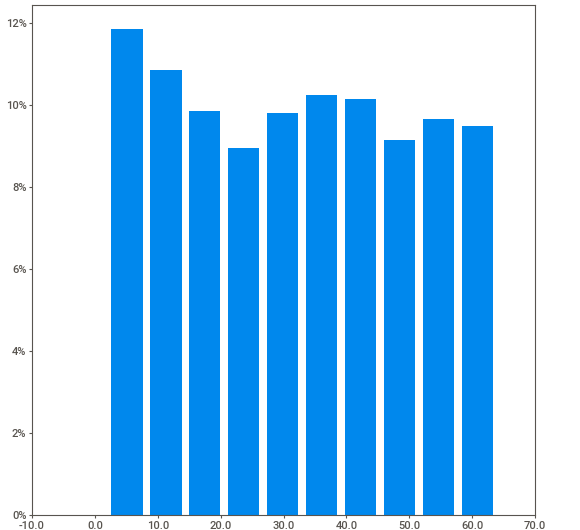
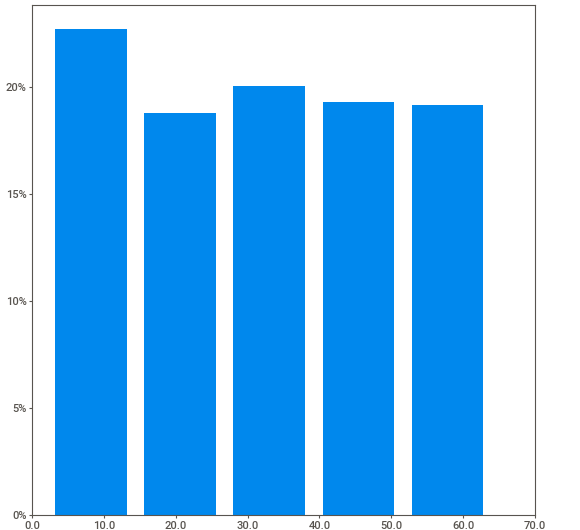
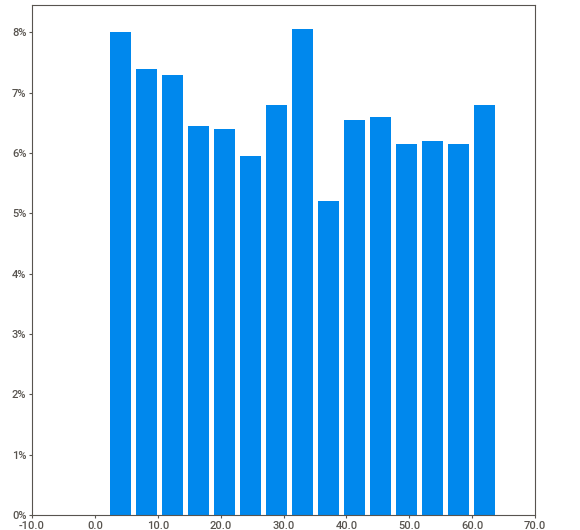
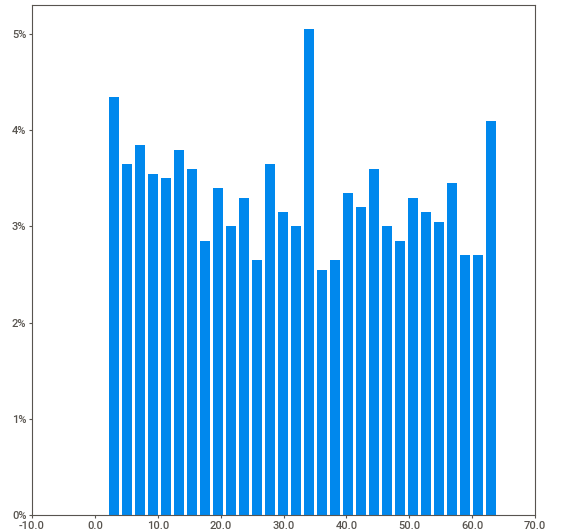
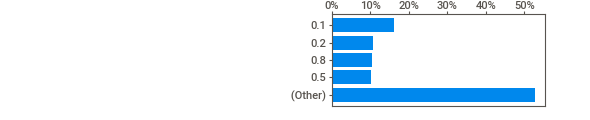
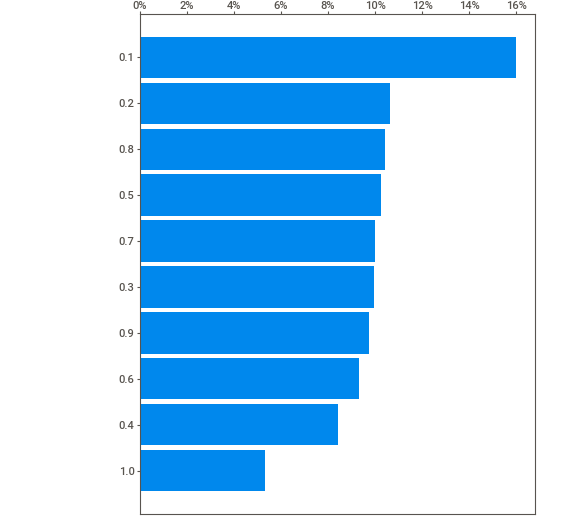
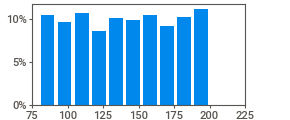
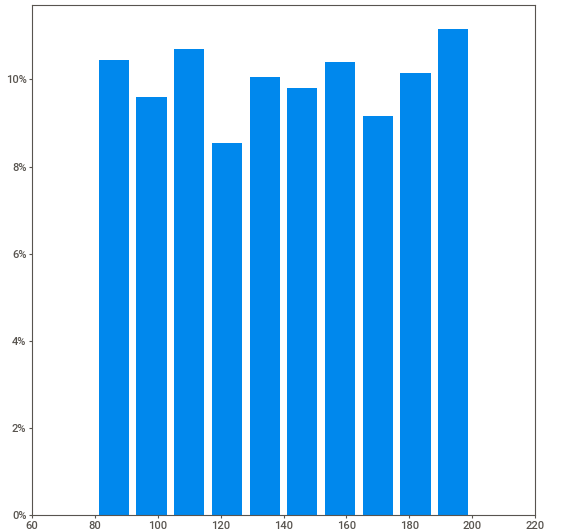
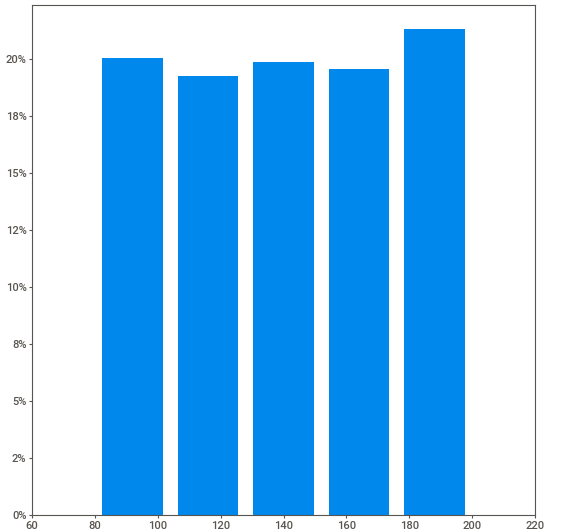
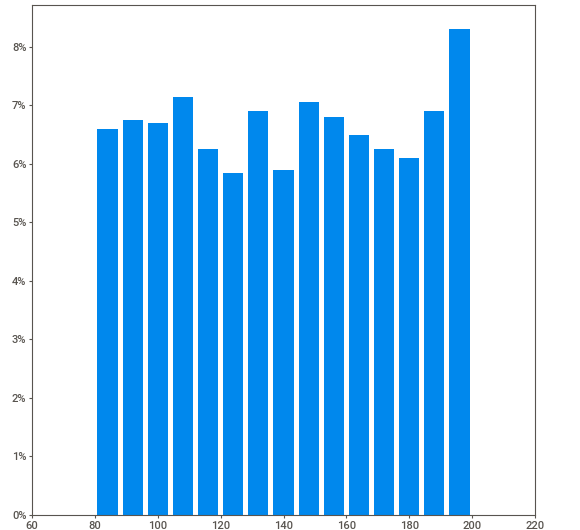
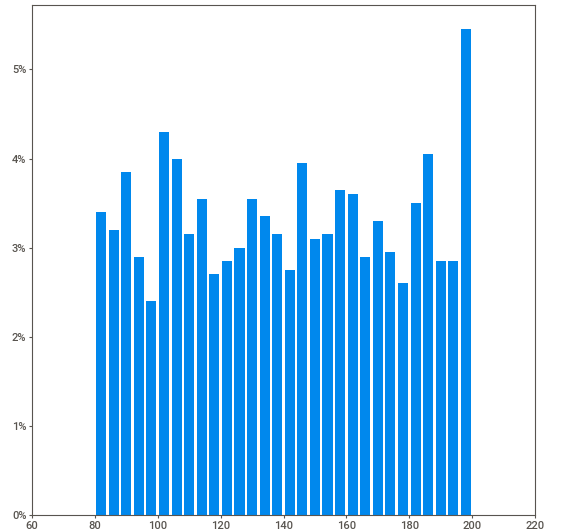
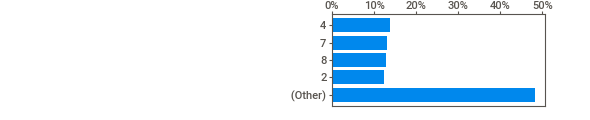
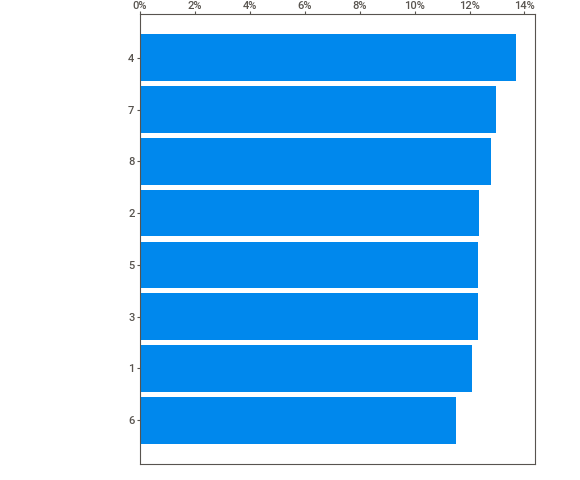
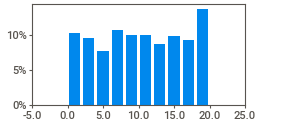
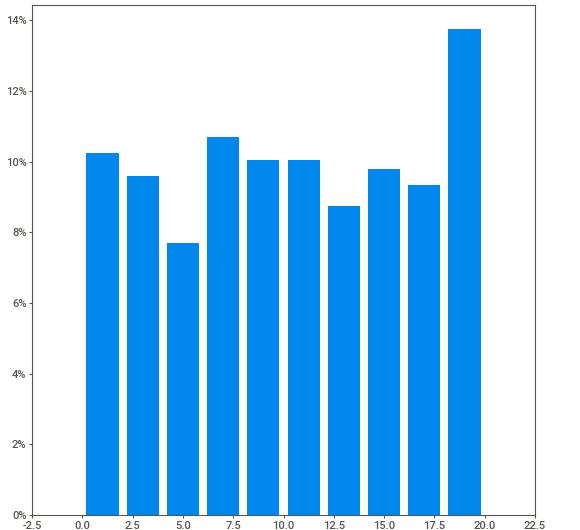
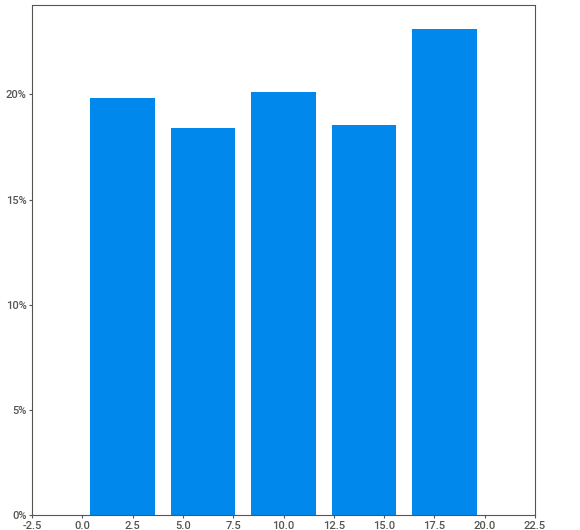
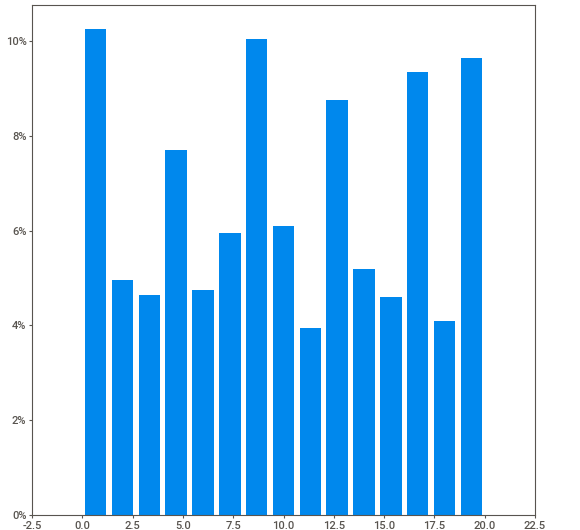
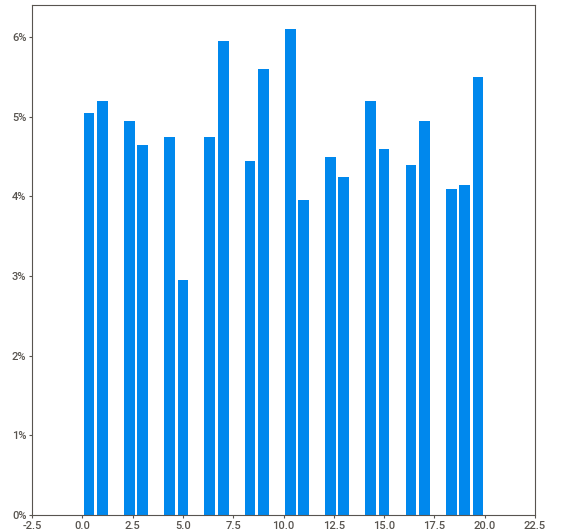
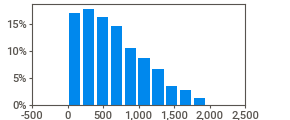
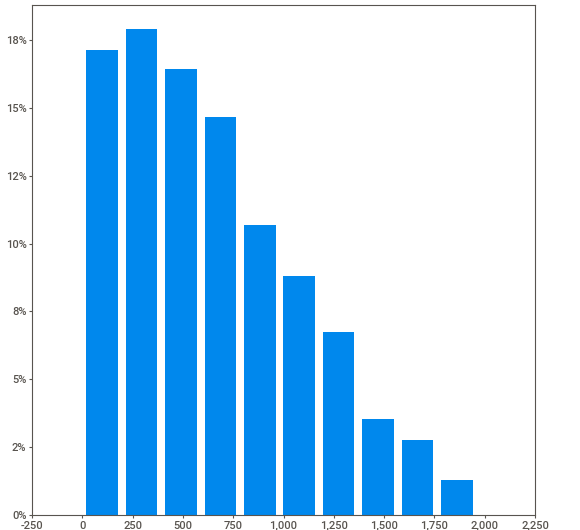
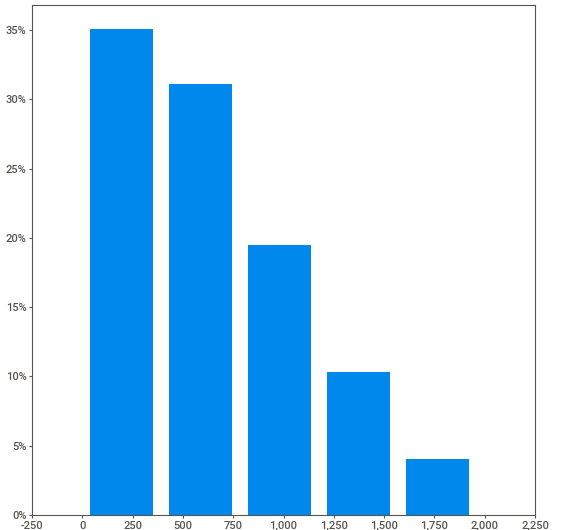
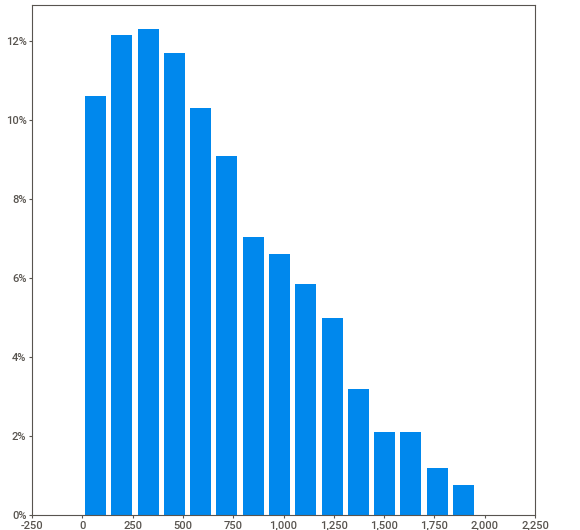
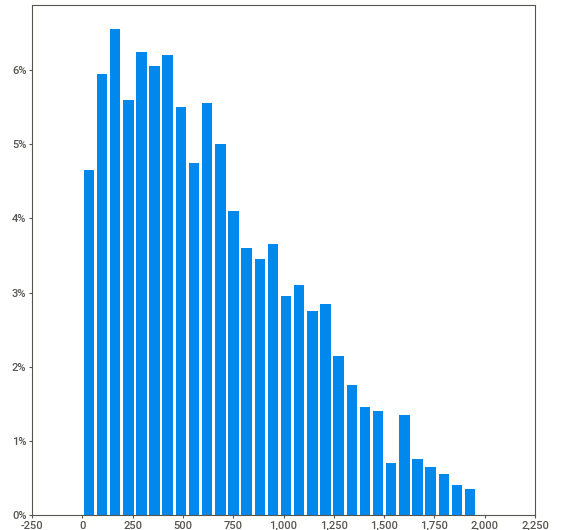
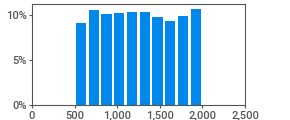
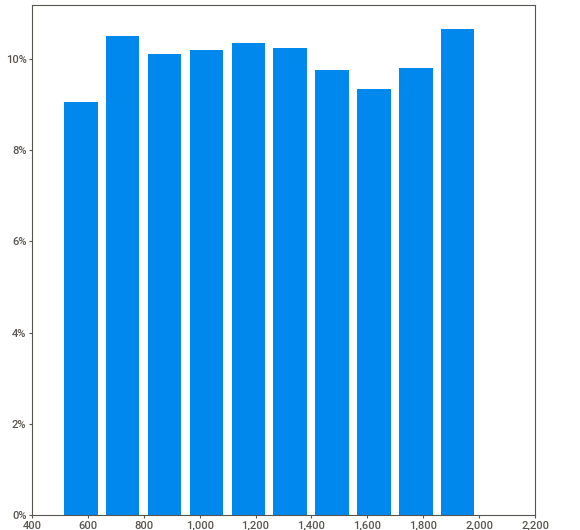
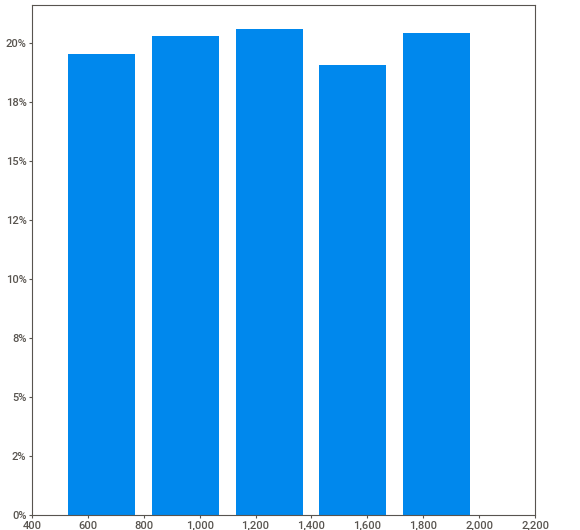
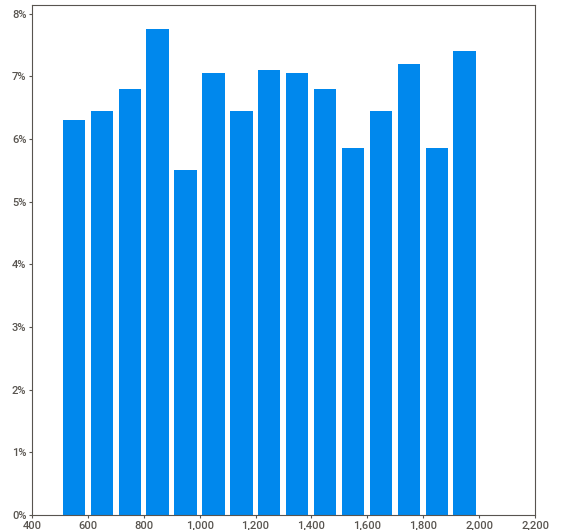
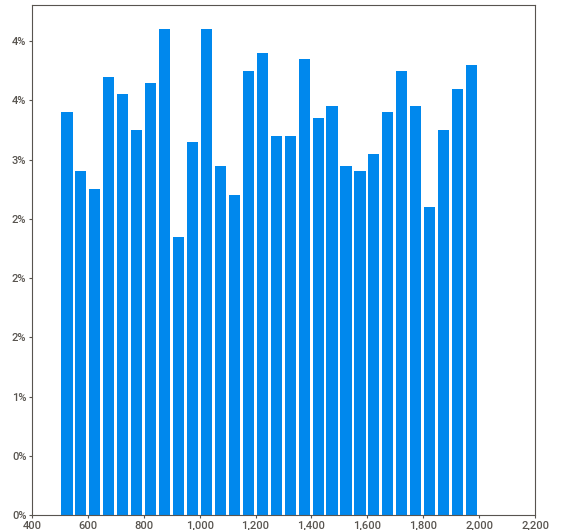
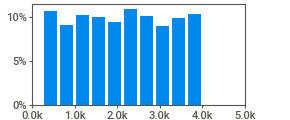
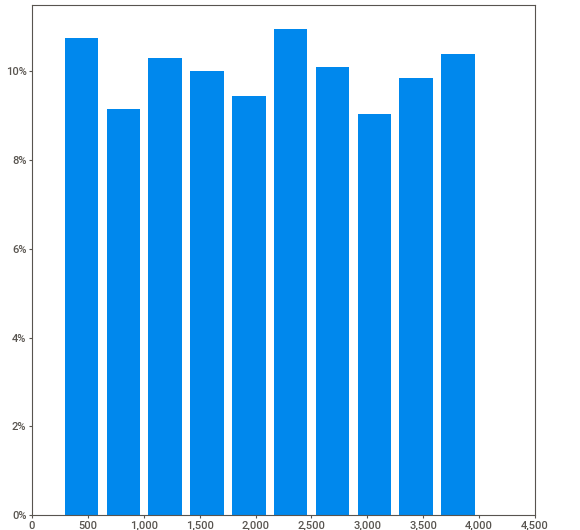
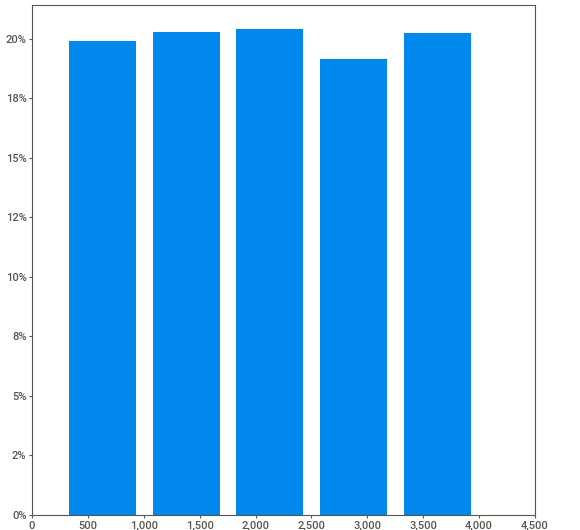
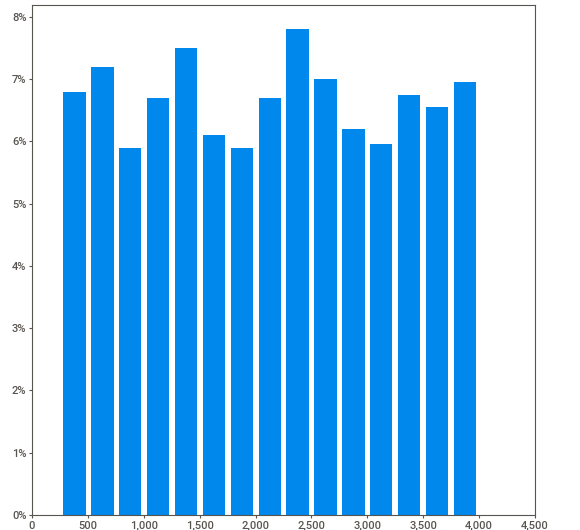
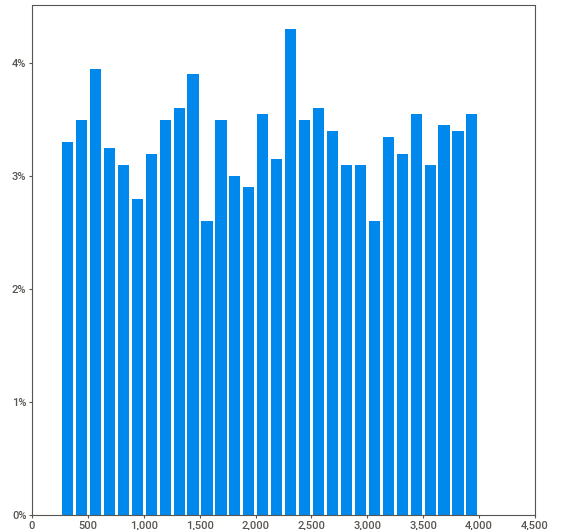
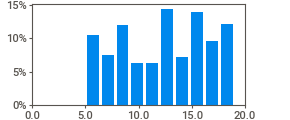
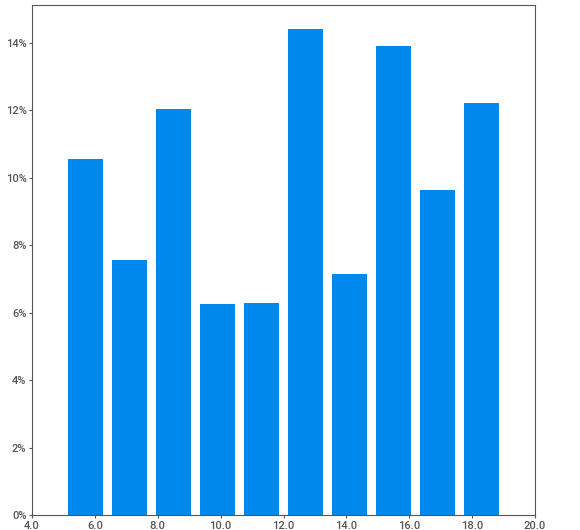
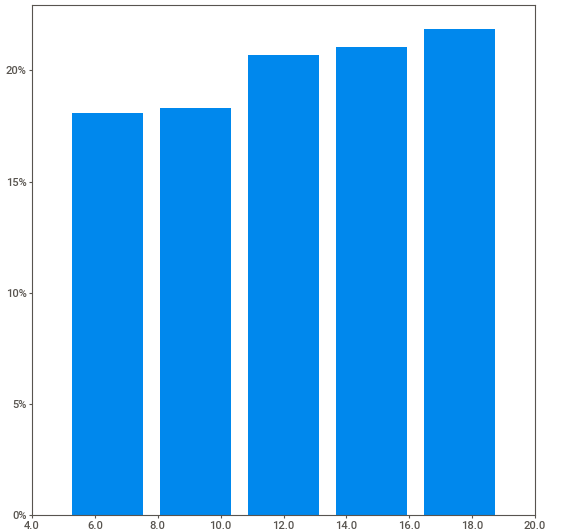
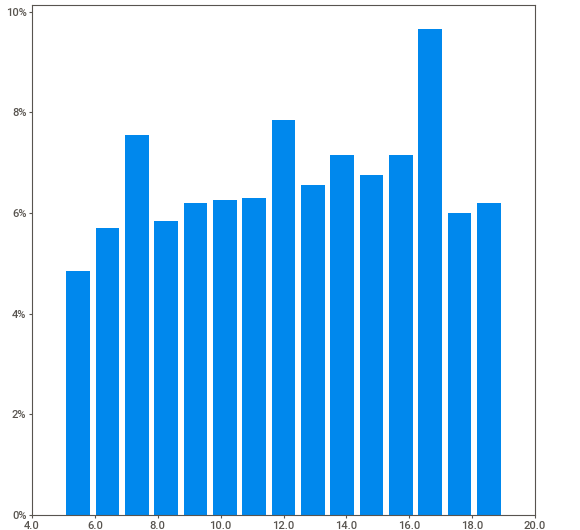
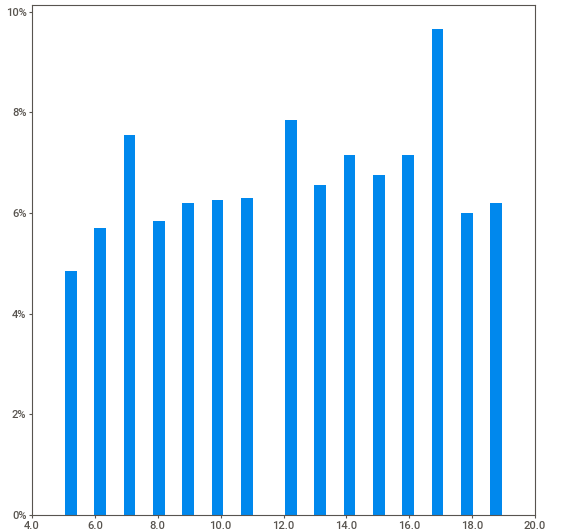
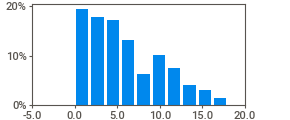
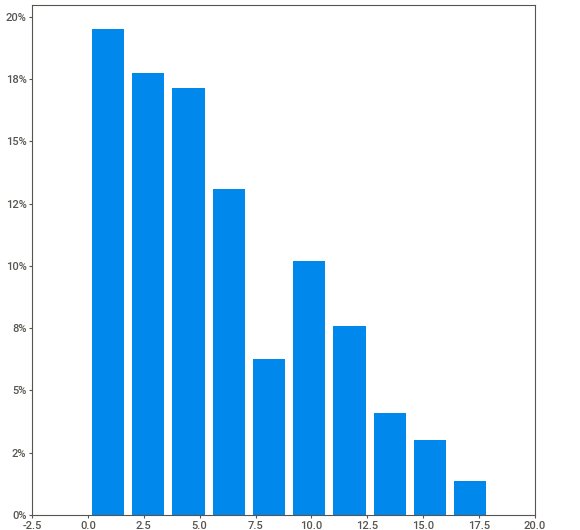
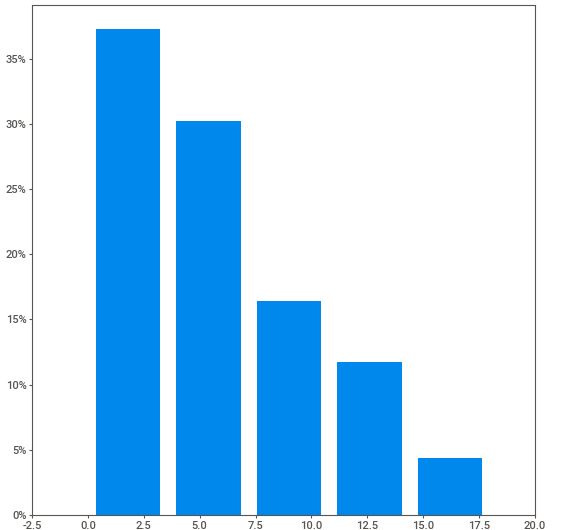
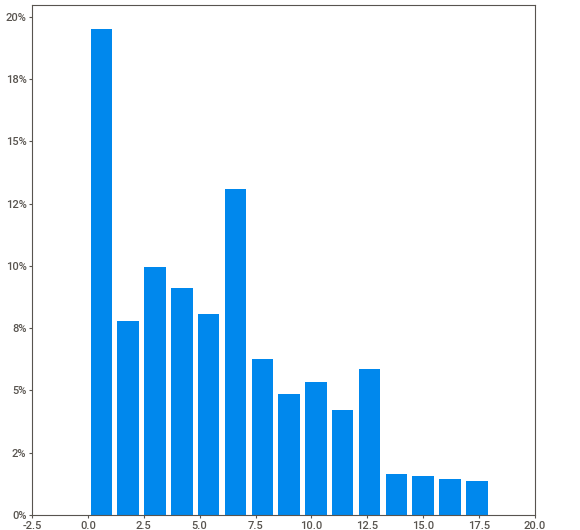
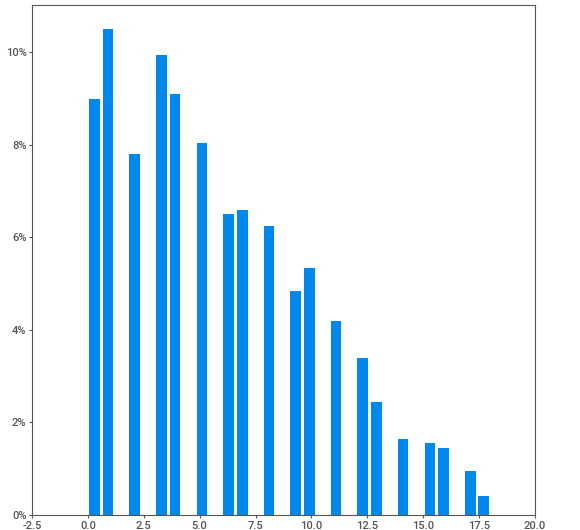
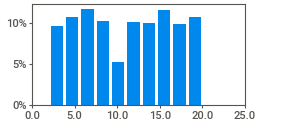
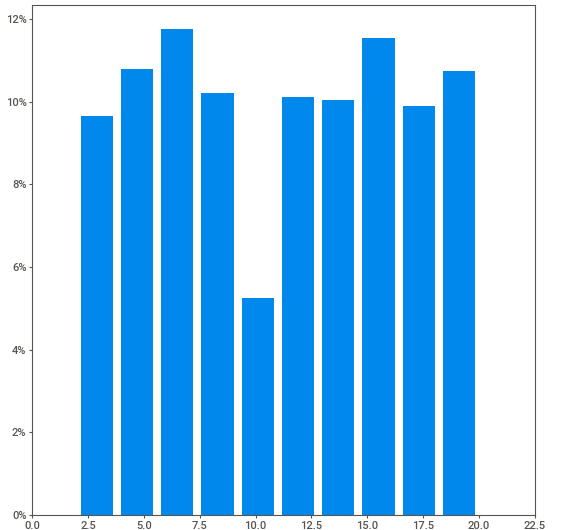
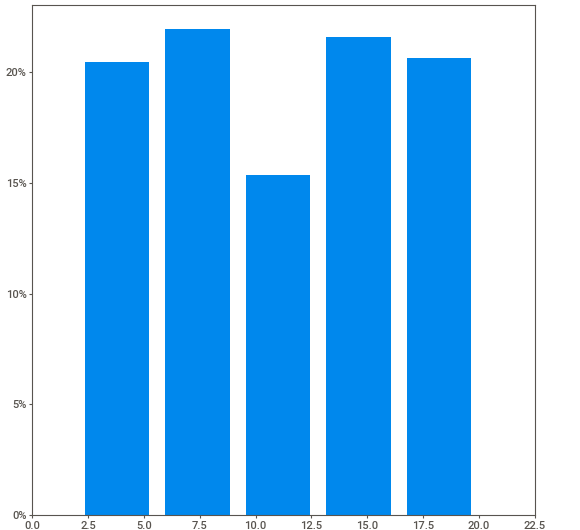
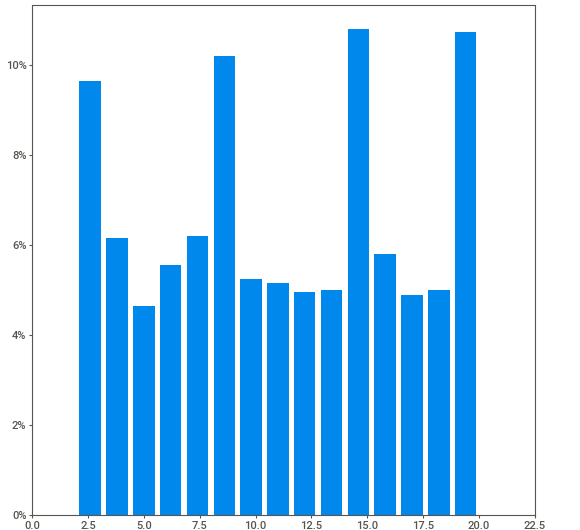
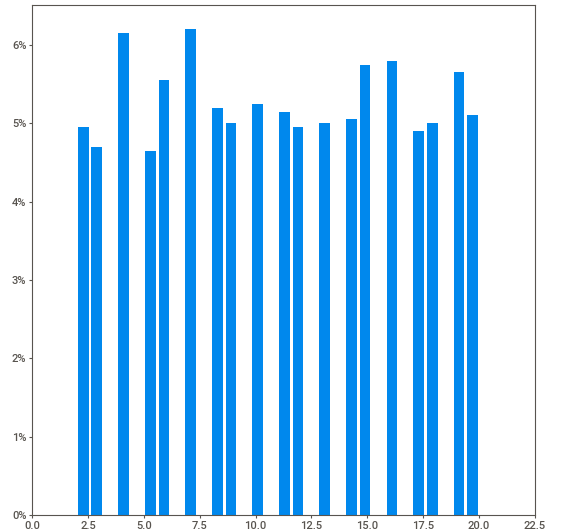
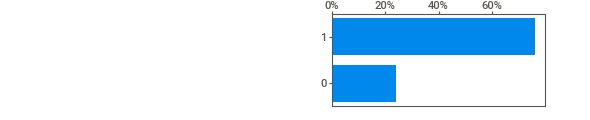
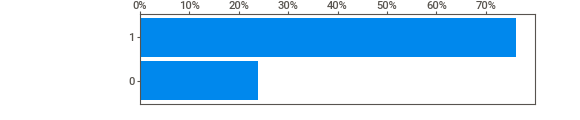
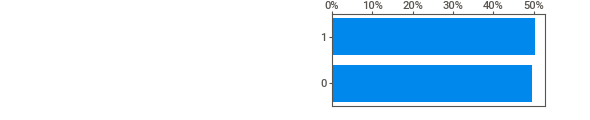
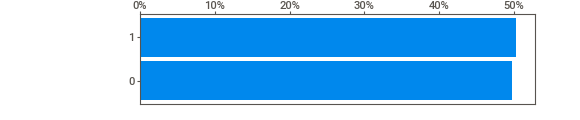
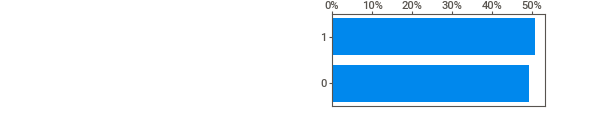
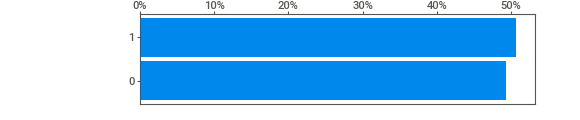
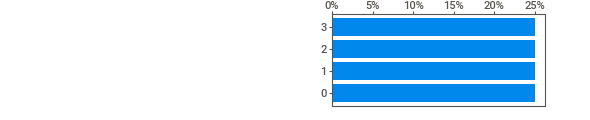
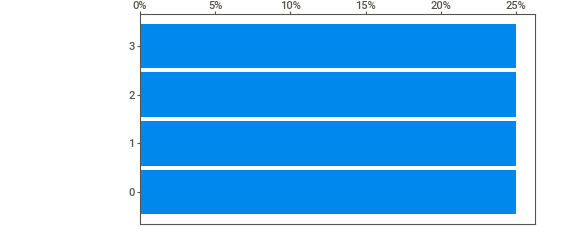
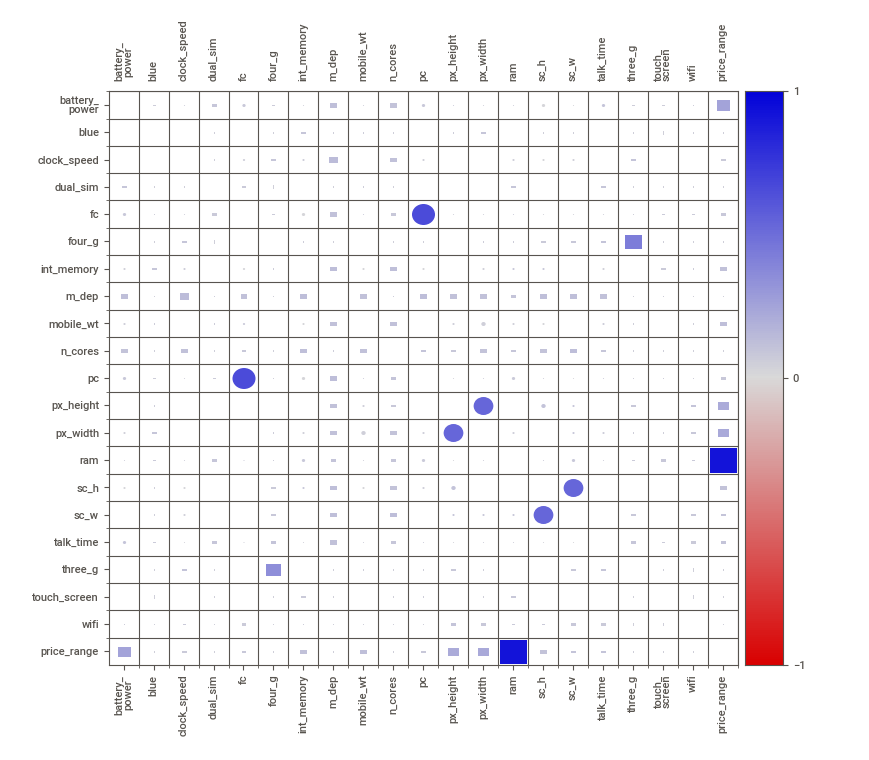
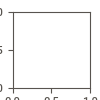

In [ ]:
IPython.display.HTML("sweet_report.html")

##**Manual EDA**

In [ ]:
# Pairplot of all features with Price range

sns.pairplot(df, hue="price_range")

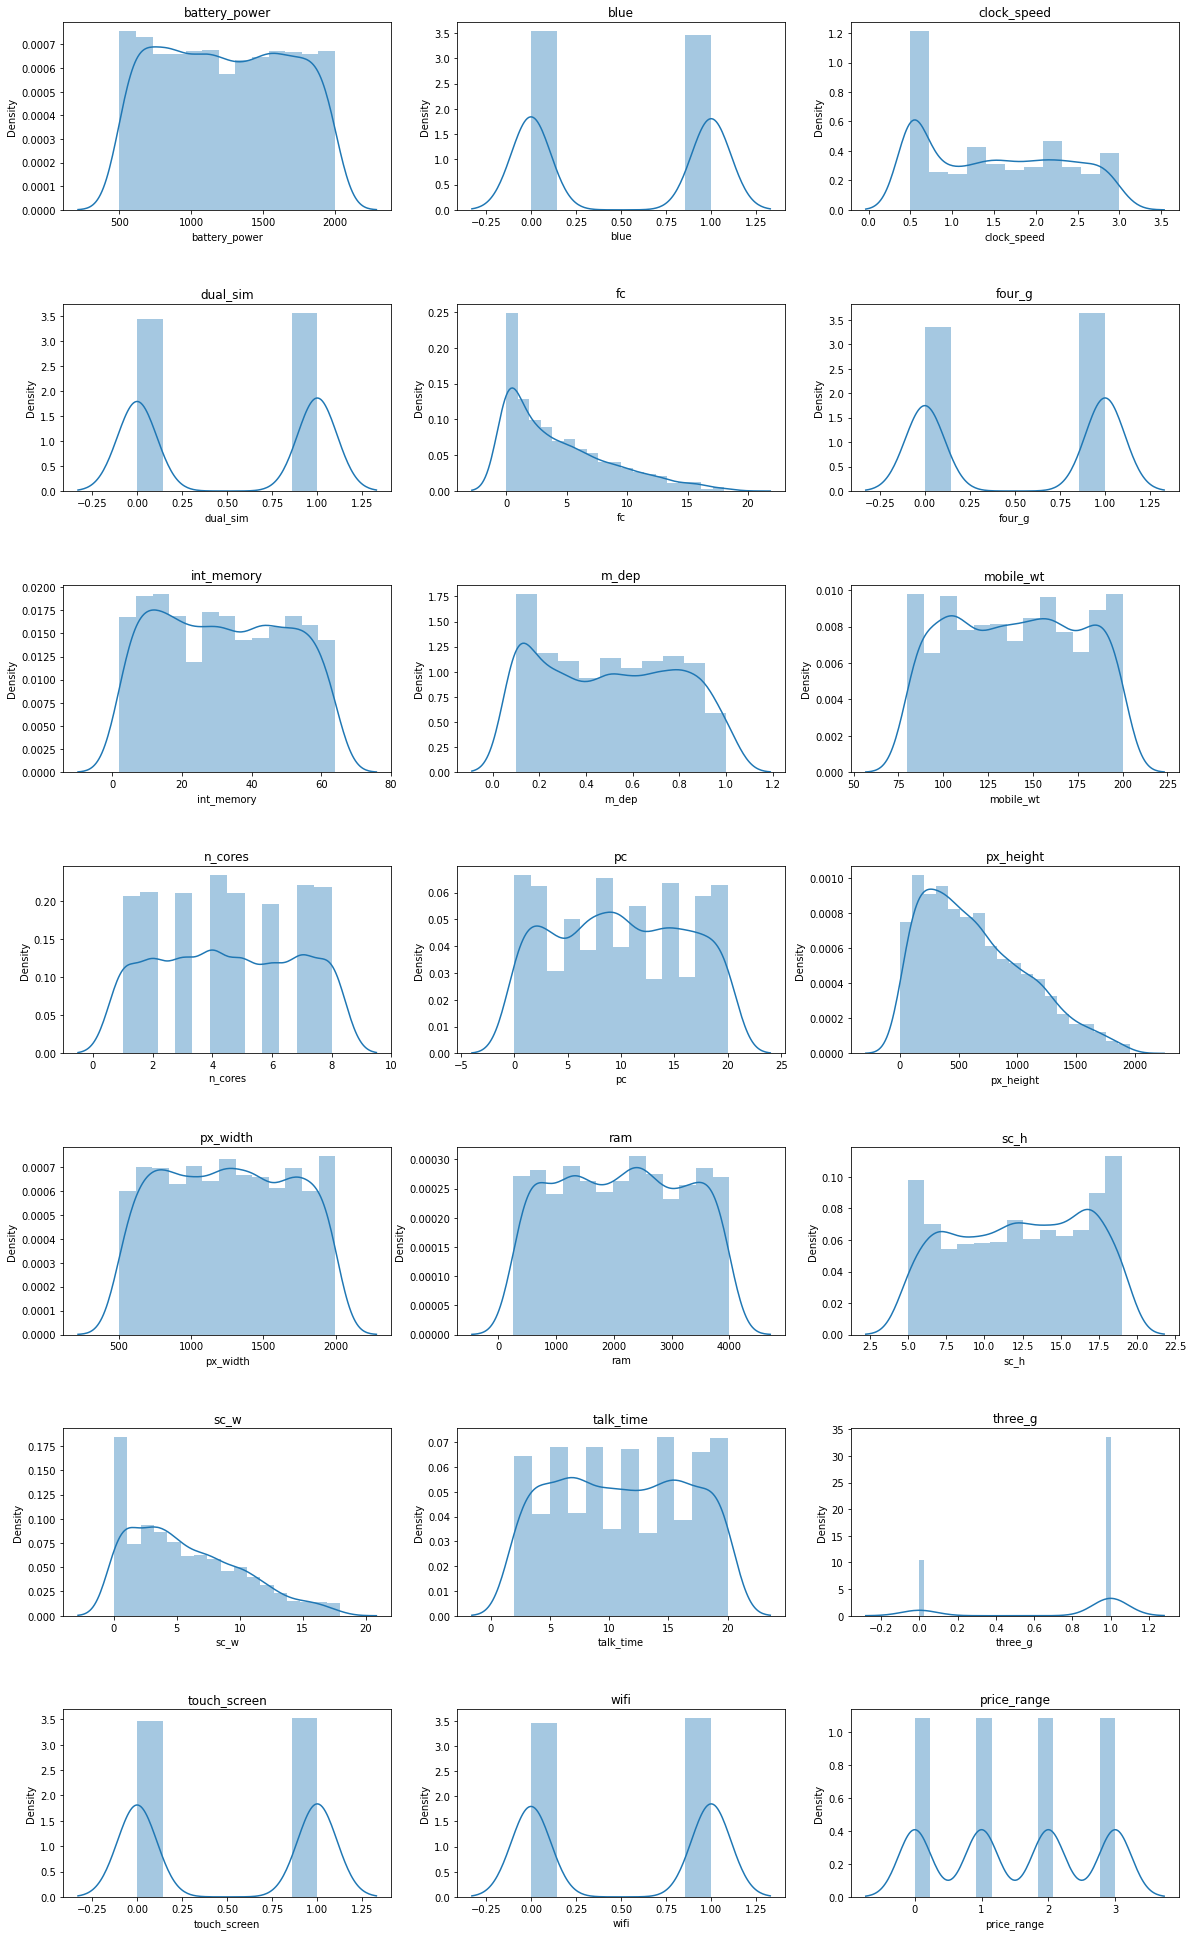

In [ ]:
# Checking distributions of all features

columns = df.columns
plt.subplots(figsize=(20,50))
length = len(columns)

for i, j in zip(columns, range(length)):
    plt.subplot((length/2), 3, j+1)
    plt.subplots_adjust(wspace=.2, hspace=.5)
    sns.distplot(df[i])
    plt.title(i)

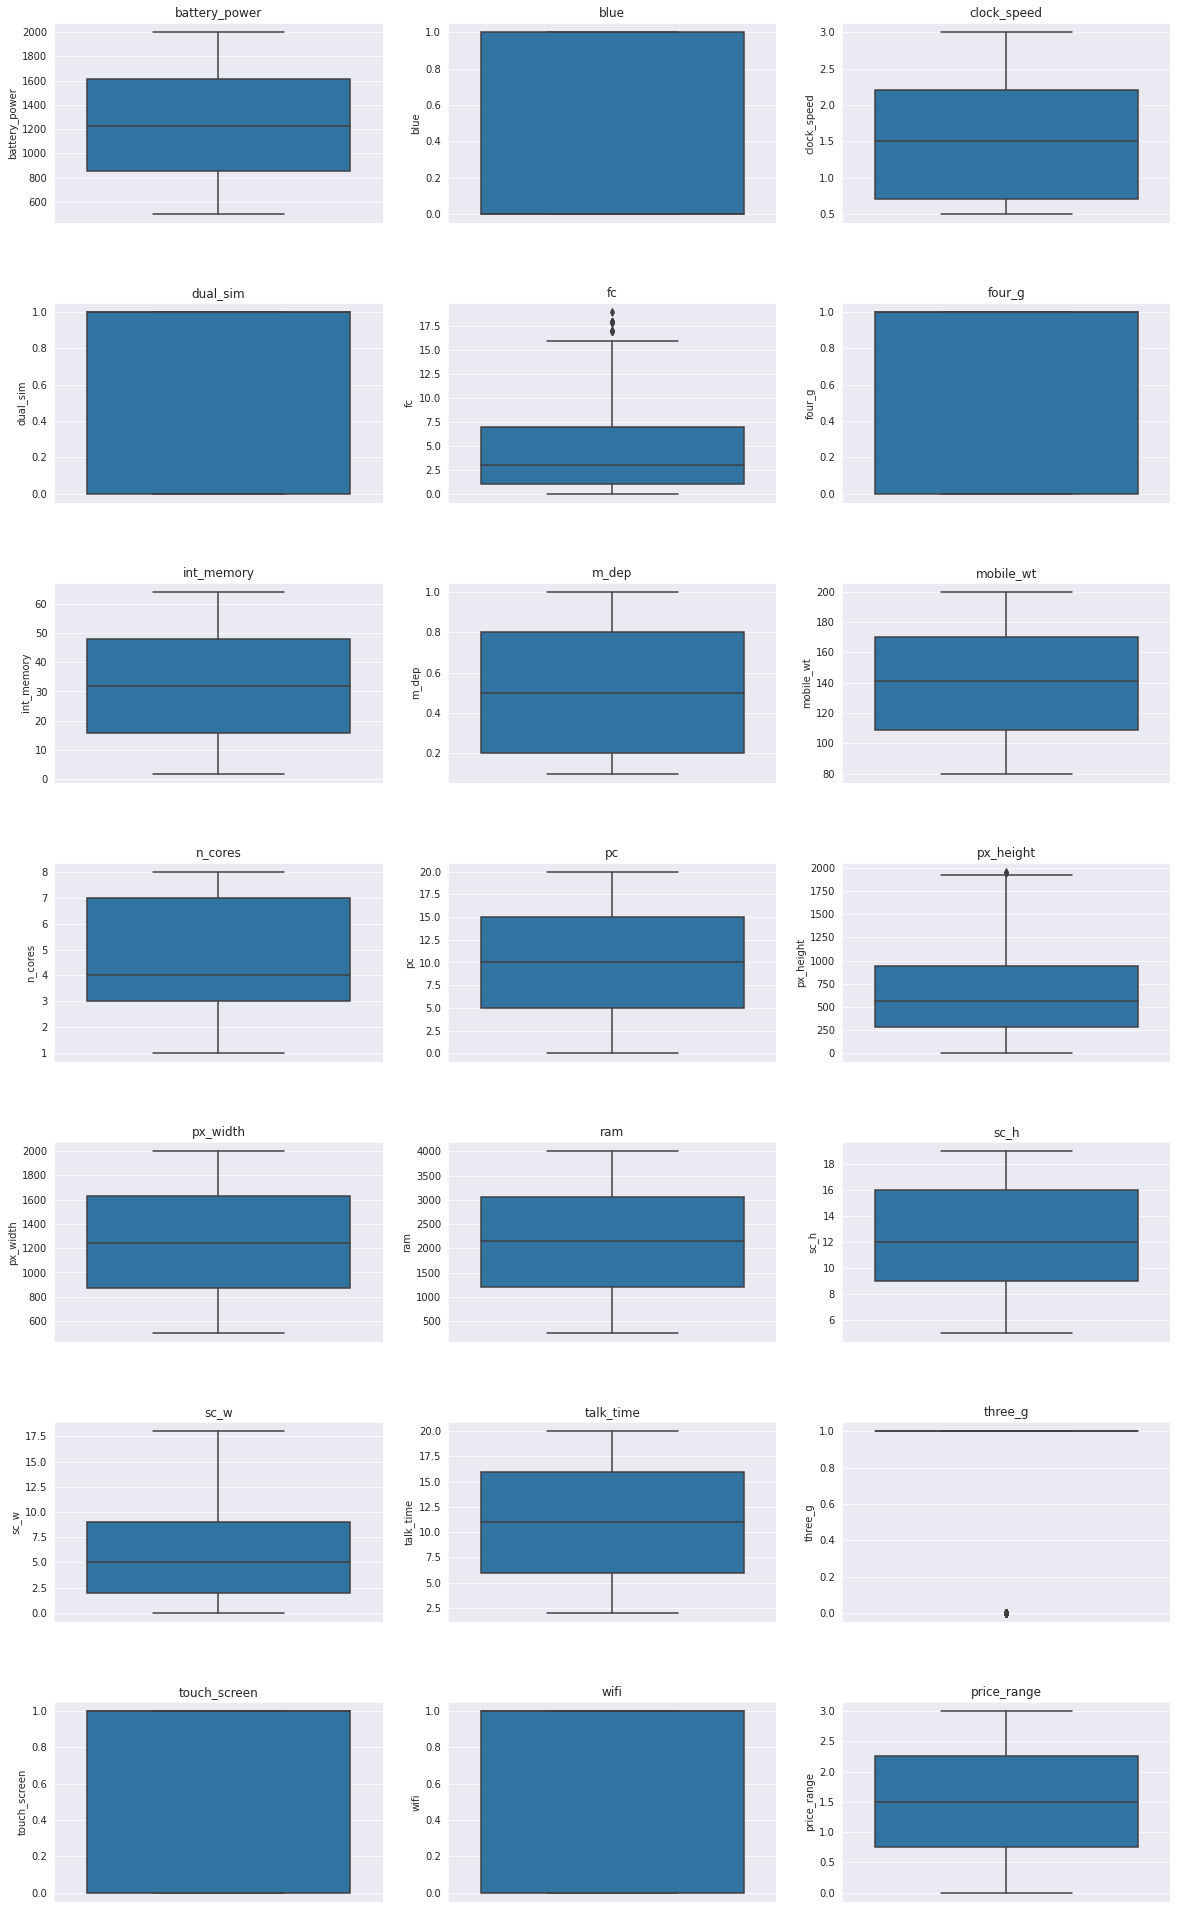

In [ ]:
# Checking outliers

plt.subplots(figsize=(20,50))
for i, j in zip(columns, range(length)):
    plt.subplot((length/2), 3, j+1)
    plt.subplots_adjust(wspace=.2, hspace=.4)
    sns.boxplot(y=df[i])
    plt.title(i)

##**Let's explore relationship b/w all features & target variable**

## Categorical variables analysis

**1) Relation b/w 3G/4G & price_range**

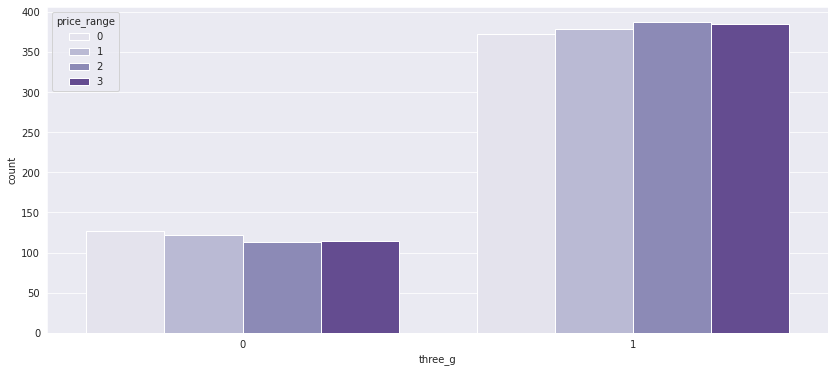

In [ ]:
# 3G countplot

plt.figure(figsize=(14,6))
sns.countplot(df["three_g"] , hue = df["price_range"] , palette = "Purples")
plt.show()

**Mobiles in the price range of 2 (i.e High cost mobiles) is more than rest of the price range category.**

**Very high price range (3) should have more number of 3G mobiles, right??**

**But, as we can see this is not the case, might be this count will be more on 4G case**

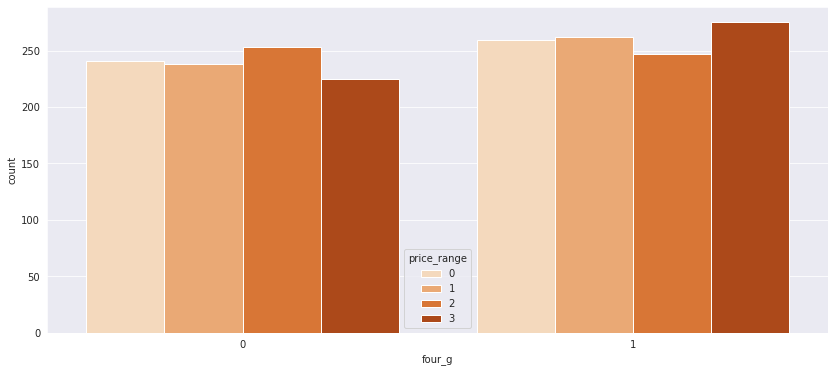

In [ ]:
# 4G count plot

plt.figure(figsize=(14,6))
sns.countplot(df["four_g"] , hue = df["price_range"] , palette = "Oranges")
plt.show()

**As we can see that mobiles having 4G is more in very high price range category (3), which seems to be obvious..**

**2) Relation b/w bluetooth & price_range**

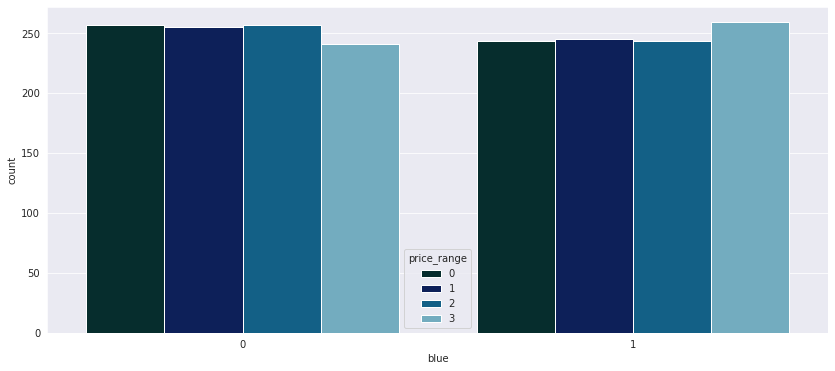

In [ ]:
# Bluetooth count plot

plt.figure(figsize=(14,6))
sns.countplot(df["blue"] , hue = df["price_range"] , palette = "ocean")
plt.show()

**3) Relation b/w dual sim & price_range**

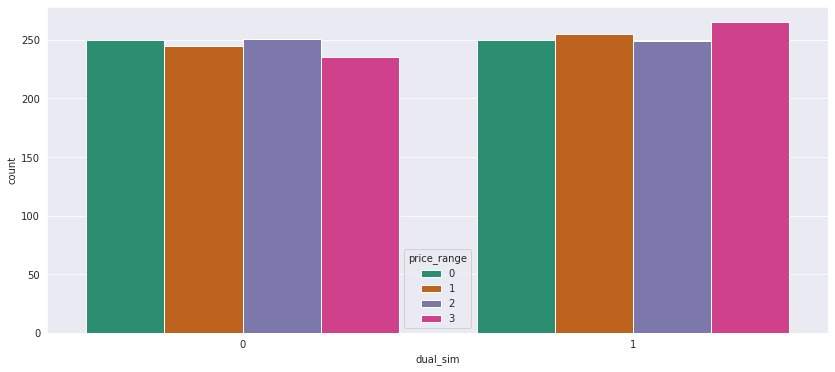

In [ ]:
# Dual sim count plot

plt.figure(figsize=(14,6))
sns.countplot(df["dual_sim"] , hue = df["price_range"] , palette = "Dark2")
plt.show()

**4) Relation b/w touch screen & price_range**

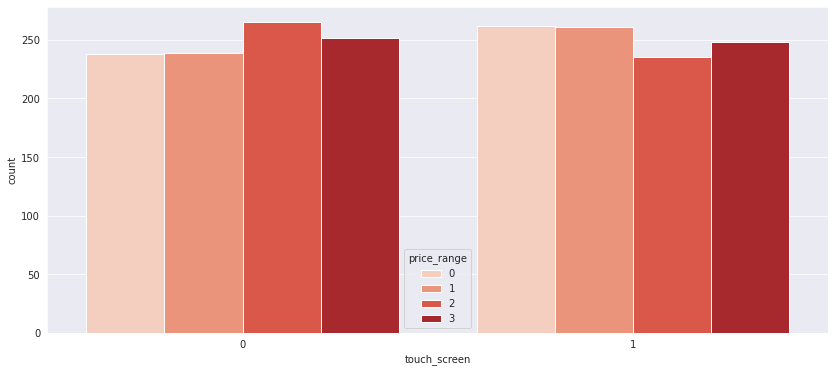

In [ ]:
# Touch screen count plot

plt.figure(figsize=(14,6))
sns.countplot(df["touch_screen"] , hue = df["price_range"] , palette = "Reds")
plt.show()

**5) Wifi** 

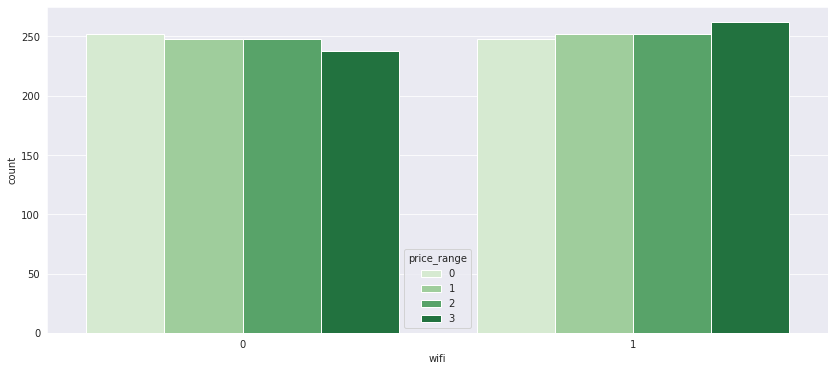

In [ ]:
# Wifi

plt.figure(figsize=(14,6))
sns.countplot(df["wifi"] , hue = df["price_range"] , palette = "Greens")
plt.show()

**6) N_cores**

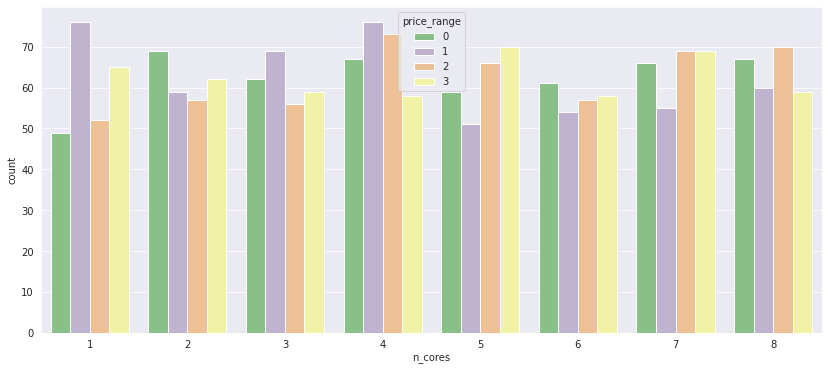

In [ ]:
# n_cores

plt.figure(figsize=(14,6))
sns.countplot(df["n_cores"] , hue = df["price_range"] , palette = "Accent")
plt.show()

## Continuous Variable analysis

**1) Relation b/w battery & price range**

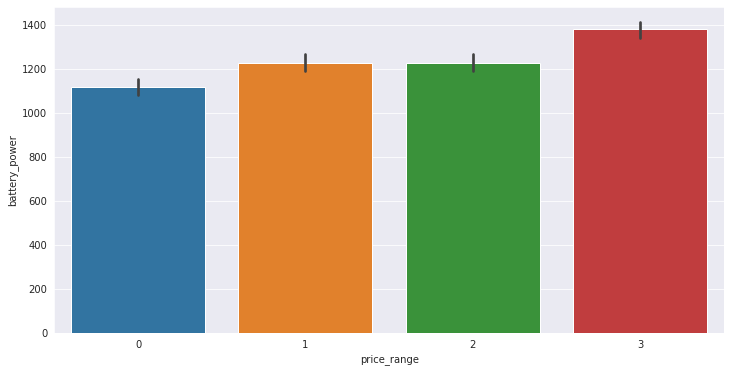

In [22]:
plt.figure(figsize=(12,6))
sns.barplot(x = "price_range" , y = "battery_power" , data=df)
plt.show()

**2) Relation b/w Pixel Height/Width & Price range**

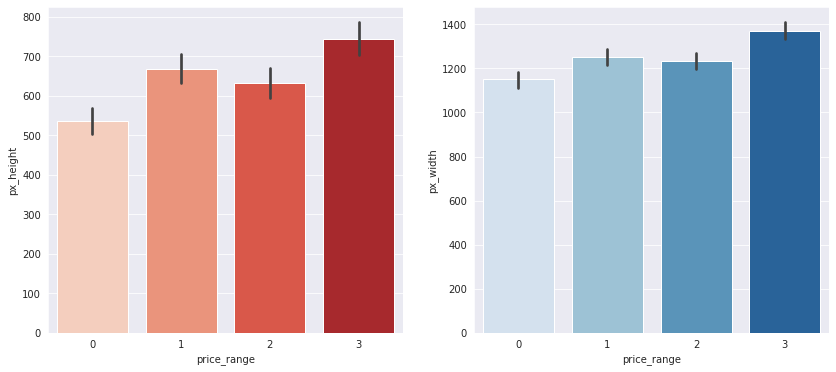

In [23]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.barplot(x = "price_range" , y = "px_height" , data= df, palette = "Reds")
plt.subplot(1,2,2)
sns.barplot(x = "price_range" , y = "px_width" , data= df, palette = "Blues")
plt.show()

**3) Relation b/w RAM & price_Range**

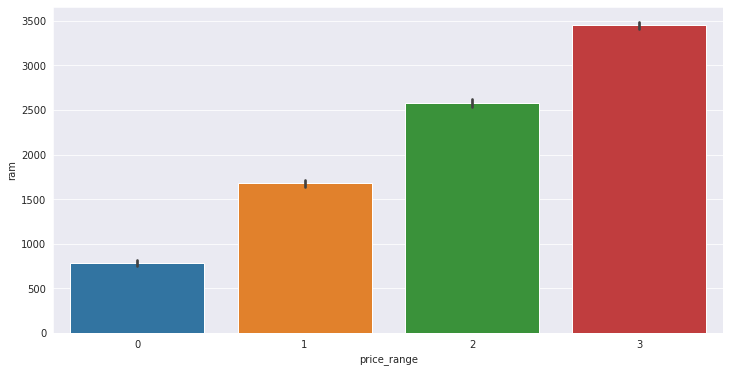

In [24]:
plt.figure(figsize=(12,6))
sns.barplot(x = "price_range" , y = "ram" , data=df)
plt.show()

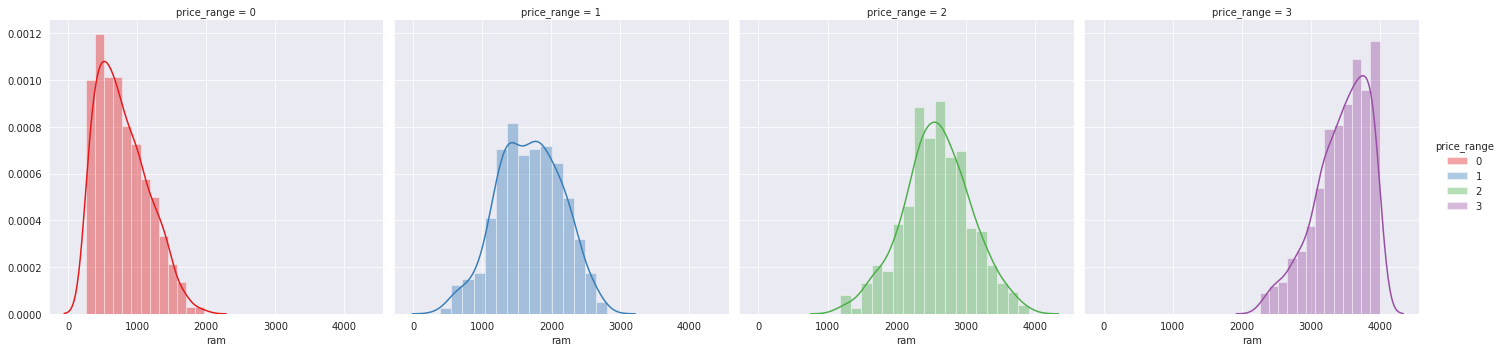

In [25]:
fg = sns.FacetGrid(df, col="price_range", hue="price_range", palette="Set1",height=5)
fg = (fg.map(sns.distplot, "ram").add_legend())

This is a positive relationship, with increase in RAM, price too increases..which is so obvious from domain knowledge as well..

There are 4 types of price range:

Type 1(low cost): RAM ranges between 0 to 2000 megabytes

Type 2(medium cost): RAM ranges between 0 to 3000 megabytes

Type 3(high cost): RAM ranges between 1000 to 4000 megabytes

Type 4(very high cost): RAM ranges between 2000 to 4000 megabytes

**4) Relation b/w clockspeed & price range**

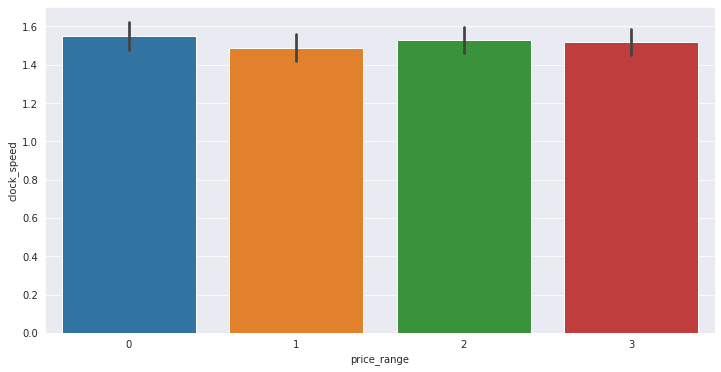

In [26]:
plt.figure(figsize=(12,6))
sns.barplot(x = "price_range" , y = "clock_speed" , data=df)
plt.show()

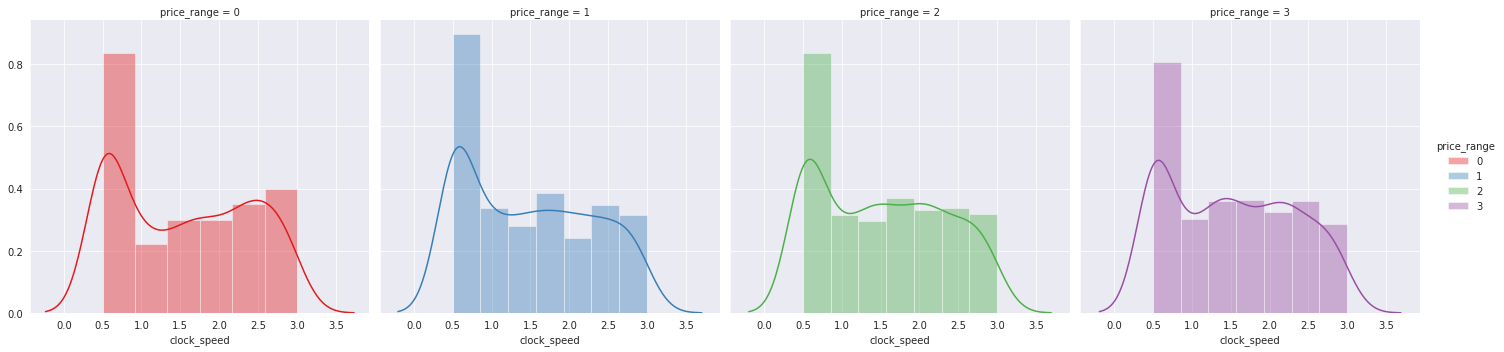

In [27]:
fg = sns.FacetGrid(df, col="price_range", hue="price_range", palette="Set1",height=5)
fg = (fg.map(sns.distplot, "clock_speed").add_legend())

**5) fc (front camera pixels)**

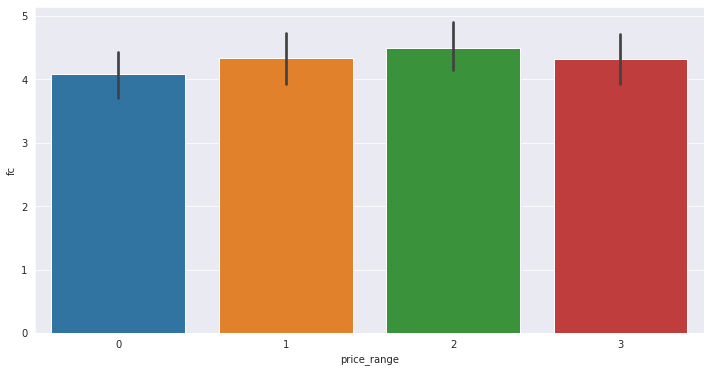

In [28]:
plt.figure(figsize=(12,6))
sns.barplot(x = "price_range" , y = "fc" , data=df)
plt.show()

**6) Int_memory (Internal memory)**

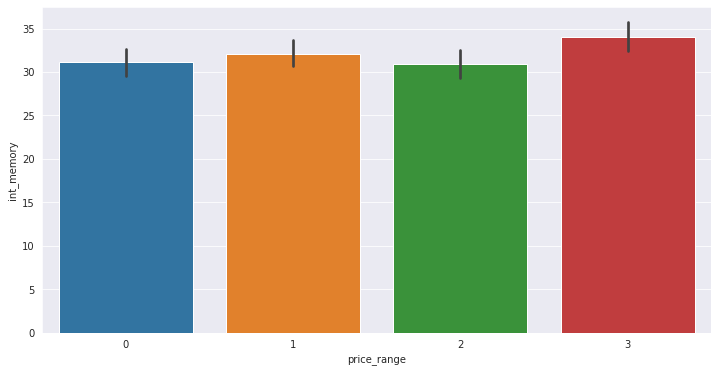

In [29]:
plt.figure(figsize=(12,6))
sns.barplot(x = "price_range" , y = "int_memory" , data=df)
plt.show()

**7) Mobile_Depth**

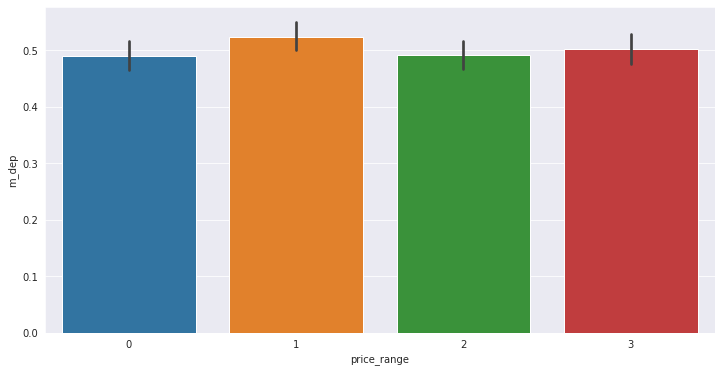

In [30]:
plt.figure(figsize=(12,6))
sns.barplot(x = "price_range" , y = "m_dep" , data=df)
plt.show()

**8) Mobile weight**

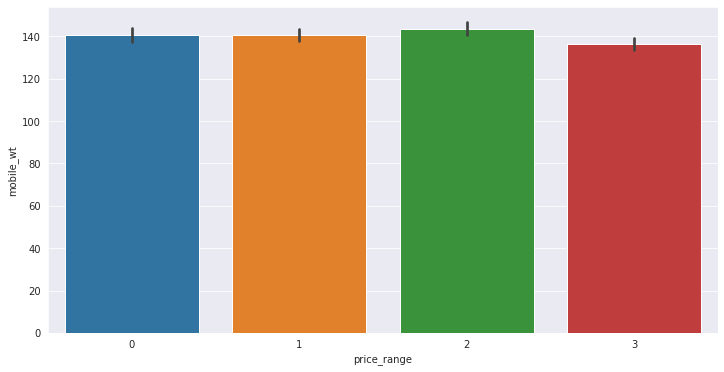

In [31]:
plt.figure(figsize=(12,6))
sns.barplot(x = "price_range" , y = "mobile_wt" , data=df)
plt.show()

**9) Pc(primary camera pixels)**

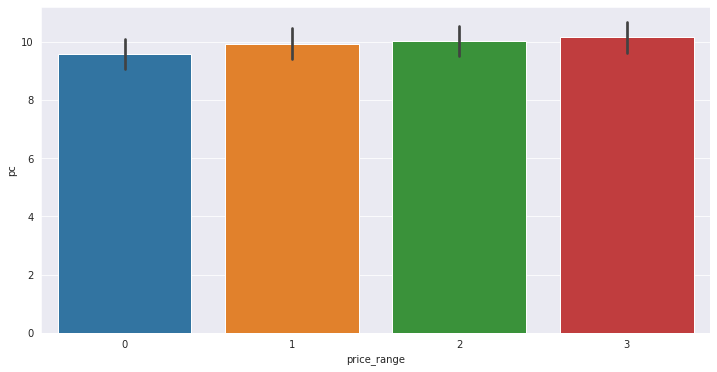

In [32]:
plt.figure(figsize=(12,6))
sns.barplot(x = "price_range" , y = "pc" , data=df)
plt.show()

**10) px_height (pixel height)**

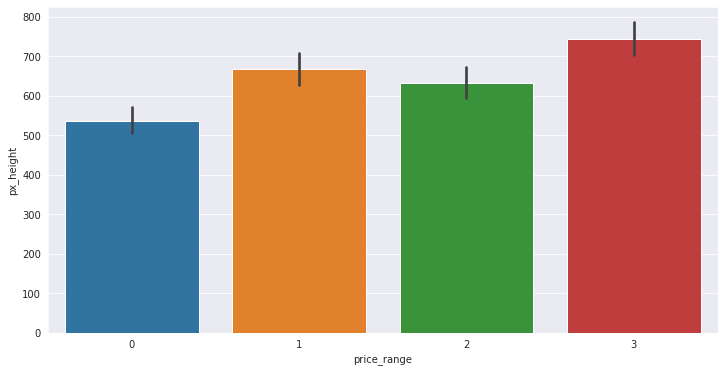

In [33]:
plt.figure(figsize=(12,6))
sns.barplot(x = "price_range" , y = "px_height" , data=df)
plt.show()

**11) px_width**

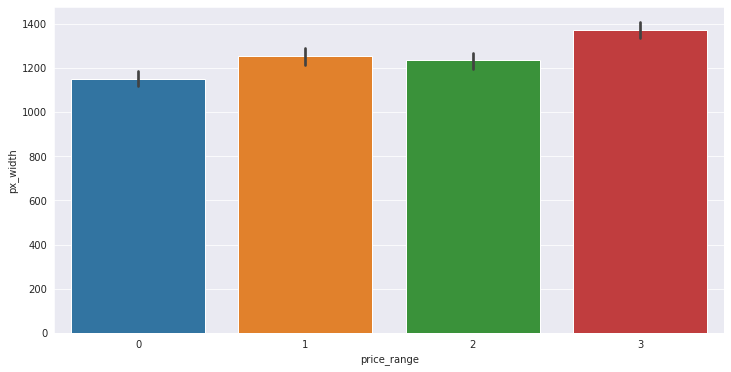

In [34]:
plt.figure(figsize=(12,6))
sns.barplot(x = "price_range" , y = "px_width" , data=df)
plt.show()

**12) sc_h (screen height)**

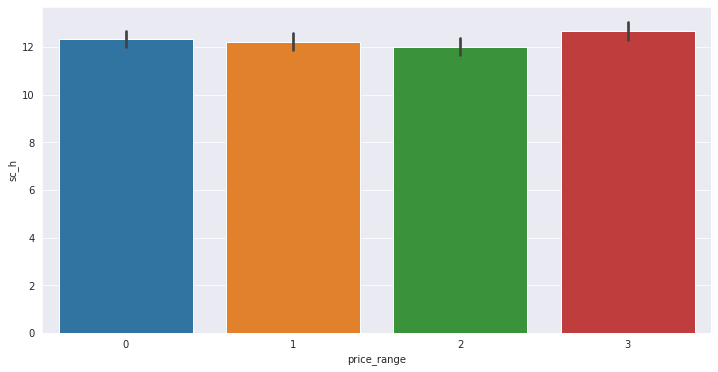

In [35]:
plt.figure(figsize=(12,6))
sns.barplot(x = "price_range" , y = "sc_h" , data=df)
plt.show()

**13) sc_w (screen width)**

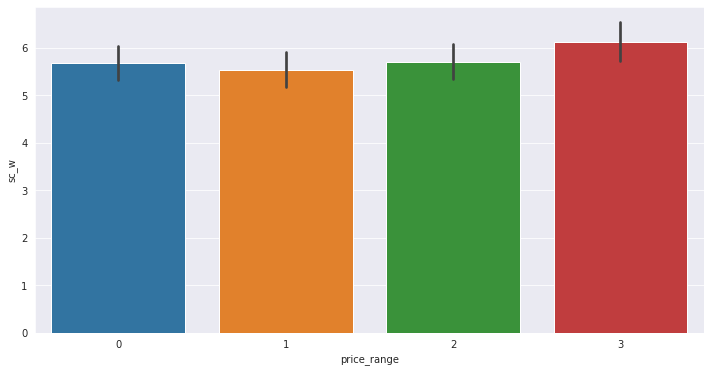

In [36]:
plt.figure(figsize=(12,6))
sns.barplot(x = "price_range" , y = "sc_w" , data=df)
plt.show()

**14) Talktime**

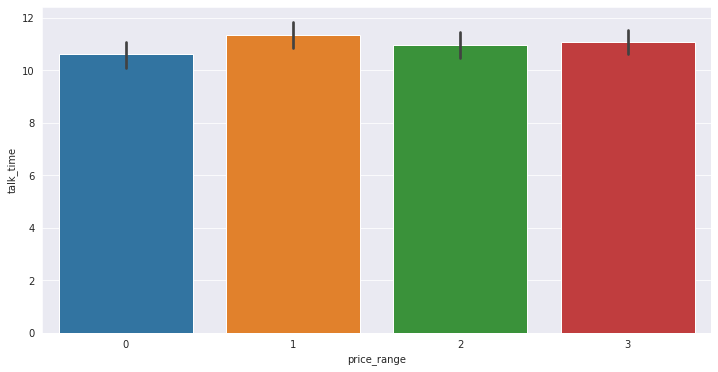

In [37]:
plt.figure(figsize=(12,6))
sns.barplot(x = "price_range" , y = "talk_time" , data=df)
plt.show()

**Let's try buliding some basic model without any feature engineering on the dataset and will see how model performs**

## Correlation

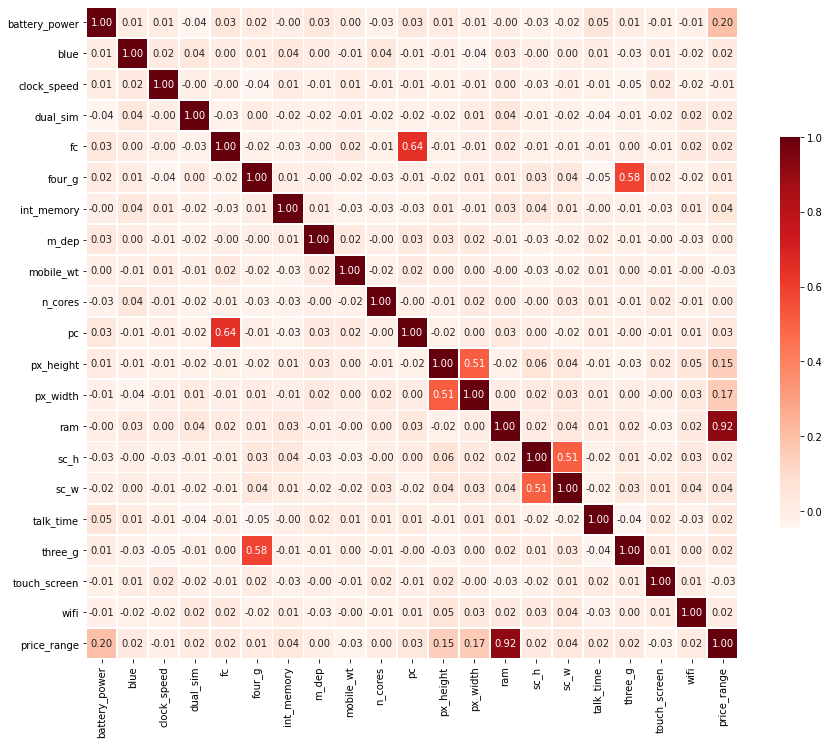

In [ ]:
# Correlation

plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), cmap=plt.cm.Reds, cbar_kws={'shrink': .6}, square=True, annot=True, fmt='.2f', linewidths=.8)
plt.show()

We can see from this correlation matrix that:

1) "RAM" & "Price range"(target variable) is highly correlated.

2) Three_g & Four_g is moderately correlated.

3) pc(primary camera) & fc(front camera) is moderately correlated.

4) px_height & px_width is moderately correlated.

5) sc_h & sc_w (screen height & screen width) is moderately correlated.


In [ ]:
# price range correlation

df.corr().sort_values(by=["price_range"],ascending=False).iloc[0].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

**Threshold correlation matrix with target variable**

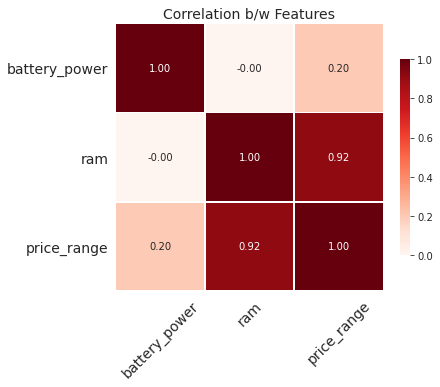

In [ ]:
corr_matrix = df.corr()

threshold = 0.20
filter = np.abs(corr_matrix["price_range"])>threshold
corr_features = corr_matrix.columns[filter].tolist()

f,ax=plt.subplots(figsize = (6,6))
sns.heatmap(df[corr_features].corr(),cmap=plt.cm.Reds, cbar_kws={'shrink': .6}, square=True, annot=True, fmt='.2f', linewidths=.8)
plt.xticks(rotation=45, size = 14)
plt.yticks(rotation=0, size = 14)
plt.title('Correlation b/w Features', size = 14)
plt.show()

## Feature engineering

In [ ]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

**Extracting new columns from existing ones**

In [40]:
# Creating single feature out of screen height & screen width
# Also, creating one more feature from px_height & px_width
# Also, creating a network feature from 3G & 4G

df["screen_size"] = ((df['sc_h']**2)+(df['sc_w']**2))**0.5 #usually vertical length
df["pixels"] = df["px_height"] * df["px_width"]

In [41]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,screen_size,pixels
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1,11.401754,15120
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,17.262677,1799140
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2,11.180340,2167308
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2,17.888544,2171776
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,8.246211,1464096


In [42]:
# Dropping original features now

df.drop(columns=["sc_h" , "sc_w" , "px_height" , "px_width"] , inplace= True)

In [43]:
df.shape

(2000, 19)

**Outlier treatment**

**From boxplot we have seen that there are few outliers in fc (front camera)**

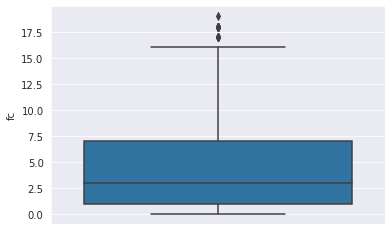

In [47]:
sns.boxplot(y=df["fc"])

In [44]:
# Outliers in fc

# IQR for fc

q1 = df["fc"].quantile(0.25)
q3 = df["fc"].quantile(0.75)
iqr = q3 - q1
print(iqr)

6.0


In [51]:
q96 = df["fc"].quantile(0.96)
q96

14.0

In [50]:
# Lower bound & upper bound

lower_limit = q1 - (1.5*iqr)
upper_limit = q3 + (1.5*iqr)

print(lower_limit)
print(upper_limit)

-8.0
16.0


In [52]:
# Replacing outliers with 96 percentile of fc

df["fc"] = np.where(df["fc"] > upper_limit, q96 ,df['fc'])

In [53]:
df.fc.describe()

count    2000.000000
mean        4.276000
std         4.250866
min         0.000000
25%         1.000000
50%         3.000000
75%         7.000000
max        16.000000
Name: fc, dtype: float64

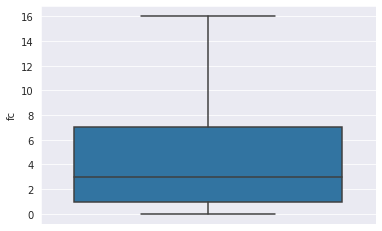

In [54]:
# Box plot for fc after outlier replacement with mean

sns.boxplot(y=df["fc"])

# Modelling

In [56]:
# Importing dependencies


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import label_binarize

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.multiclass import OneVsRestClassifier

from lightgbm import LGBMClassifier


In [57]:
# X's & y's

X = df.drop("price_range" , axis = 1)
y = df["price_range"]

In [58]:
X.shape

(2000, 18)

In [59]:
y.shape

(2000,)

**Train Test Split**

In [60]:
# Train test split

random_state = 42 # will use this state frequently, that's why storing in a variable

X_train, X_test, y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = random_state)

In [61]:
# Basic sanity check of split

X_train.shape

(1400, 18)

In [62]:
X_test.shape

(600, 18)

In [63]:
# Distribution of y_train

y_train.value_counts()

1    354
2    352
0    349
3    345
Name: price_range, dtype: int64

In [64]:
# Distribution of y_test

y_test.value_counts()

3    155
0    151
2    148
1    146
Name: price_range, dtype: int64

**Standardization**

In [65]:
# Standardization using Standard scaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Models**

Hyperparameter Tuning - Grid Search - Cross Validation

We will compare 8 classifier and evaluate mean accuracy of each of them by stratified cross validation.

Decision Tree Classifier

SVC

Random Forest Classifier

Logistic Regression

KNN Classifier

Stochastic Gradient Descent Classifier

Gradient Boosting Classifier

LightGBM Classifier

---------------------------------------------------------------------------
Fitting 10 folds for each of 250 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 296 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 2497 out of 2500 | elapsed:   11.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:   11.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Model: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')
Accuracy: %84.0
MSE: 0.15333333333333332
ROC AUC: 0.9292531645284448
Recall: 0.8466666666666667
Precision: 0.8483489540459996
F1-Score: 0.8463428417646685
Best Estimator: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_s

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  2.1min finished


Model: SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)
Accuracy: %92.71
MSE: 0.08166666666666667
ROC AUC: 0.9938441051520965
Recall: 0.9183333333333333
Precision: 0.9192195113327418
F1-Score: 0.9182762171468188
Best Estimator: SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)
---------------------------------------------------------------------------
Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   48.7s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  4.6min finished


Model: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
Accuracy: %89.79
MSE: 0.11166666666666666
ROC AUC: 0.9847298754406573
Recall: 0.8883333333333333
Precision: 0.8902975554909551
F1-Score: 0.8887228061205457
Best Estimator: RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_spl

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   18.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy: %93.5
MSE: 0.07833333333333334
ROC AUC: 0.9945707140395238
Recall: 0.9216666666666666
Precision: 0.9224477690267952
F1-Score: 0.9215328686991061
Best Estimator: LogisticRegression(C=11.288378916846883, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
---------------------------------------------------------------------------
Fitting 10 folds for each of 360 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 718 tasks      | elapsed:   42.2s
[Parallel(n_jobs=-1)]: Done 1284 tasks      | elapsed:   57.2s
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed:  1.5min finished


Model: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
Accuracy: %63.86
MSE: 0.355
ROC AUC: 0.8516024511838476
Recall: 0.66
Precision: 0.6627283286873059
F1-Score: 0.6601662578488983
Best Estimator: KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='distance')
---------------------------------------------------------------------------
Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:   21.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Model: SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
Accuracy: %84.71
MSE: 0.13333333333333333
ROC AUC: 0.9692702429094966
Recall: 0.8666666666666667
Precision: 0.865491450332982
F1-Score: 0.8660083948048292
Best Estimator: SGDClassifier(alpha=0.01, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l1', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, 

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   44.5s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  5.2min finished


Model: GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
Accuracy: %89.43
MSE: 0.115
ROC AUC: 0.9822353786742757
Recall: 0.885
Precision: 0.8865470877607818
F1-Score: 0.8854780877193097
Best Estimator: GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=3

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   31.5s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:  2.2min finished


Model: LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
Accuracy: %89.93
MSE: 0.11333333333333333
ROC AUC: 0.9843709382162852
Recall: 0.8866666666666667
Precision: 0.8871993288875444
F1-Score: 0.8867673760895782
Best Estimator: LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', lambda_l1=0, lambda_l2=0,
               learning_rate=0.1, max_depth=-1, min_child_samples=20,
               min_child_weight=0.001, min_data_in_leaf=50, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=N

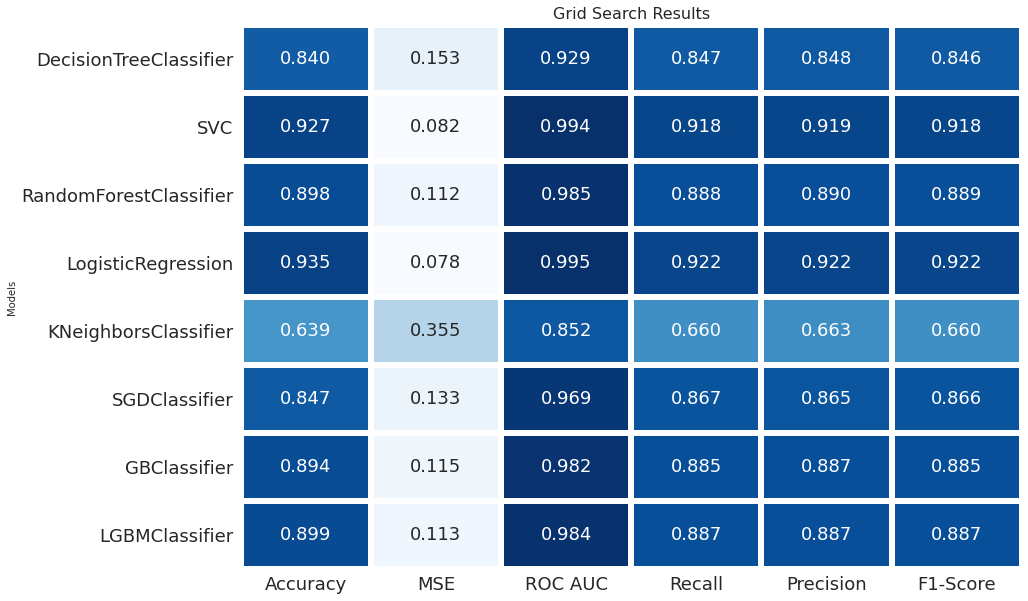

In [67]:
# Instantiating the classifiers, tuning the hyperparameters & building model

classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state, probability = True),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state),
             KNeighborsClassifier(),
             SGDClassifier(random_state = random_state),
             GradientBoostingClassifier(random_state = random_state),
             LGBMClassifier(random_state = random_state)]

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [0.1, 1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-4, 4, 20),
                    "penalty": ["l1","l2","none"]}

knn_param_grid = {"n_neighbors": np.linspace(2,20,12, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan","minkowski"],
                 "leaf_size": [1,3,5,12,30]}

sgdc_param_grid = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "none"]}

gbc_param_grid = {
    "learning_rate": [0.05, 0.1, 0.2],
    "min_samples_split": [2,3,10],
    "min_samples_leaf": [1,3,10]
    }


lgbmc_param_grid = {
    'num_leaves': [31, 127],
    'reg_alpha': [0.1, 0.5],
    'min_data_in_leaf': [30, 50, 100, 300],
    'lambda_l1': [0, 1, 1.5],
    'lambda_l2': [0, 1]}


classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid,
                   sgdc_param_grid,
                   gbc_param_grid,
                   lgbmc_param_grid]

cv_result = []
best_estimators = []
mean_squared_errors = []
roc_auc_scores = []
recall_scores = []
precision_scores = []
f1_scores = []


for i in range(len(classifier)):
    print("---------------------------------------------------------------------------")
    clf = GridSearchCV(classifier[i],
                       param_grid=classifier_param[i],
                       cv = StratifiedKFold(n_splits = 10),
                       scoring = "accuracy",
                       n_jobs = -1,verbose = 2)
    
    clf.fit(X_train,y_train)
    
    cv_result.append(clf.best_score_)
    
    mean_squared_errors.append(mean_squared_error(y_test,clf.predict(X_test)))
    
    roc_auc_scores.append(roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr'))
    
    recall_scores.append(recall_score(y_test, clf.predict(X_test), average='weighted'))
    
    precision_scores.append(precision_score(y_test, clf.predict(X_test), average='weighted'))
    
    f1_scores.append(f1_score(y_test, clf.predict(X_test), average='weighted'))
    
    best_estimators.append(clf.best_estimator_)
    
    print("Model: {}".format(classifier[i]))
    print("Accuracy: %{}".format(round(cv_result[i]*100,2)))
    print("MSE: {}".format(mean_squared_errors[i]))
    print("ROC AUC: {}".format(roc_auc_scores[i]))
    print("Recall: {}".format(recall_scores[i]))
    print("Precision: {}".format(precision_scores[i]))
    print("F1-Score: {}".format(f1_scores[i]))
    print("Best Estimator: {}".format(clf.best_estimator_))
    
print("---------------------------------------------------------------------------")

sns.set_style("darkgrid")
cv_results = pd.DataFrame({"Accuracy":cv_result,
                           "MSE":mean_squared_errors,
                           "ROC AUC":roc_auc_scores,
                           "Recall": recall_scores,
                           "Precision": precision_scores,
                           "F1-Score":f1_scores,
                           "Models":["DecisionTreeClassifier", 
                                     "SVC",
                                     "RandomForestClassifier",
                                     "LogisticRegression",
                                     "KNeighborsClassifier",
                                     "SGDClassifier",
                                     "GBClassifier",
                                     "LGBMClassifier"]})

cv_results.index = cv_results["Models"]

cv_results  = cv_results.drop(["Models"], axis = 1)

f,ax = plt.subplots(figsize=(14,10))

sns.heatmap(cv_results, annot=True,cmap = "Blues",fmt= '.3f',
            ax=ax,linewidths = 5, cbar = False,
            annot_kws={"size": 18})

plt.xticks(size = 18)
plt.yticks(size = 18, rotation = 0)
plt.ylabel("Models")
plt.title("Grid Search Results", size = 16)
plt.show()

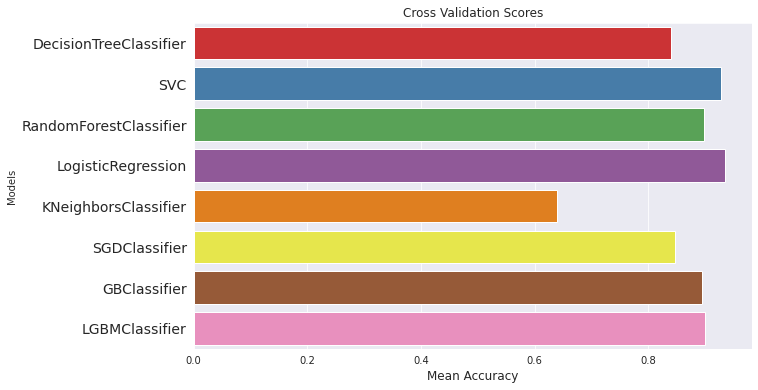

In [68]:
# Plotting Models & their scores

sns.set_style("darkgrid")
cv_results = pd.DataFrame({"Cross Validation Means":cv_result,
                           "Models":["DecisionTreeClassifier", "SVC",
                                     "RandomForestClassifier",
                                     "LogisticRegression",
                                     "KNeighborsClassifier",
                                     "SGDClassifier",
                                     "GBClassifier",
                                     "LGBMClassifier"]})

plt.figure(figsize = (10,6))
sns.barplot("Cross Validation Means", "Models",
            data = cv_results, palette = "Set1")
plt.xlabel("Mean Accuracy",
           size = 12)
plt.yticks(size = 14)
plt.title("Cross Validation Scores",
          size = 12)
plt.show()

Ensemble Learning (Voting classifier)

In [69]:
votingC = VotingClassifier(estimators = [("svc",best_estimators[1]),
                                        ("lr",best_estimators[3]),
                                        ("lgbm",best_estimators[7])])

votingC = votingC.fit(X_train, y_train)

voting_pred = votingC.predict(X_test)

print(classification_report(y_test, voting_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       151
           1       0.88      0.94      0.91       146
           2       0.91      0.84      0.87       148
           3       0.92      0.94      0.93       155

    accuracy                           0.92       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.92      0.92      0.92       600



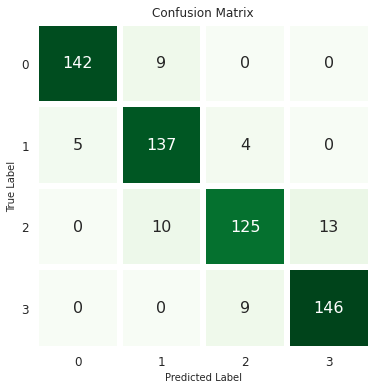

In [70]:
cm = confusion_matrix(y_test, voting_pred)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="Greens", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

Best Estimator

In [71]:
classifier = LogisticRegression(C=545.5594781168514, random_state=42)

classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       151
           1       0.90      0.95      0.92       146
           2       0.91      0.86      0.89       148
           3       0.93      0.94      0.93       155

    accuracy                           0.93       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.93      0.93      0.92       600



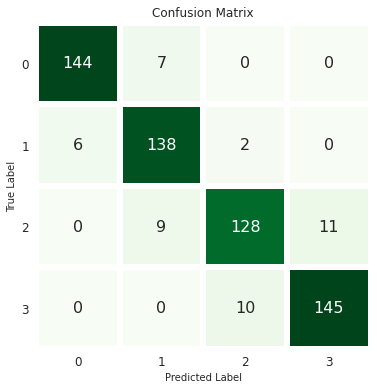

In [72]:
cm = confusion_matrix(y_test, y_pred)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="Greens", fmt= '.0f',ax=ax,
            linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

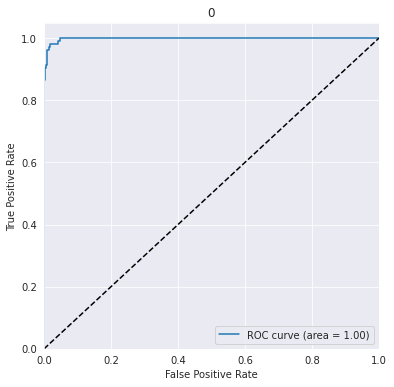

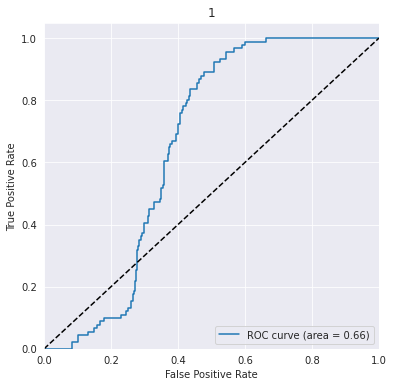

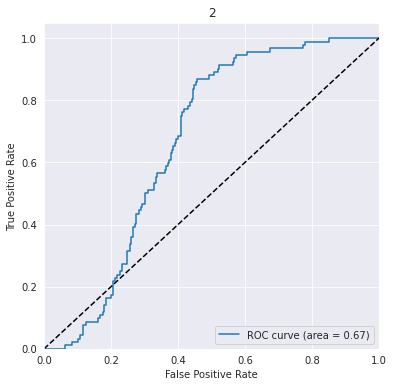

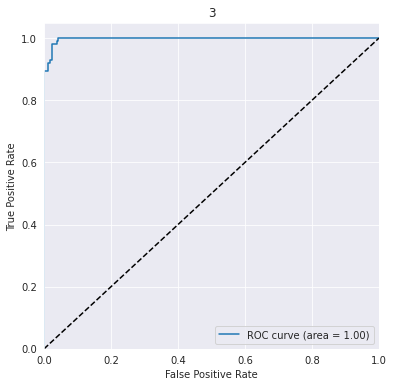

In [73]:
# X's & y's

X = df.drop("price_range" , axis = 1)
y = df["price_range"]

y = label_binarize(y, classes=[0,1,2,3])
n_classes = 4

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

clf = OneVsRestClassifier(best_estimators[3])
y_score = clf.fit(X_train, y_train).decision_function(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i],
                                  y_score[:, i])
    roc_auc[i] = auc(fpr[i],
                     tpr[i])

for i in range(n_classes):
    plt.figure(figsize = (6,6))
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(i)
    plt.legend(loc="lower right")
    plt.show()